***
<h3 align="center" style="font-weight: bold; font-family: Arial, Helvetica, sans-serif;">
<strong>DS312: Data Mining and Applications</strong>
</h3>
<h3 align="center" style="font-weight: bold; font-family: Arial, Helvetica, sans-serif;">
<strong>DS313: Advanced Database Management System</strong>
</h3>

***

<h1 align="center" style="font-weight: bold; font-family: Arial, Helvetica, sans-serif;">
Nexbit: A Cryptocurrency Analytics and Forecasting Dashboard Powered by News Sentiment
</h1>

<h5 align="center" style="font-family: Arial, Helvetica, sans-serif;">
John Vincent Gamali - Jezzel Faith Gier - Ian Jure Macalisang - Ephraem Nanay - Qylle Christian Quiño - Christine Joy Sorronda
</h5>

<br>

***

## **PHASE 1:** API Selection

Our goal for this project is to predict cryptocurrency price movements by analyzing sentiment from news data and leveraging derived technical indicators. To achieve this, we will utilize the **Alpha Vantage Market News & Sentiment API** and the **CoinCompare API** to collect the necessary data for analysis and machine learning tasks. Additionally, we will use the **CoinMarketCap API** to gather basic cryptocurrency information, such as supply and market data.

<br>

**Alpha Vantage Market News & Sentiment API**

The Alpha Vantage Market News & Sentiment API provides access to real-time news articles and sentiment analysis for financial markets, including cryptocurrencies. We will use its news endpoint to gather cryptocurrency-related headlines and articles. The sentiment analysis, which categorizes articles as positive, neutral, or negative, will help us determine the overall market sentiment toward specific cryptocurrencies. This sentiment will be a key input for the predictive model, enabling us to quantify the potential impact of news events on price movements.

<br>

**CoinCompare API**

The CoinCompare API offers comprehensive cryptocurrency market data, including real-time and historical price movements, trading volume, and market capitalization. We will use this API to retrieve historical data and calculate key technical indicators such as moving averages and the Relative Strength Index (RSI). These indicators will provide insights into market trends and price momentum.

<br>

**CoinMarketCap API**

The CoinMarketCap API will be used to collect basic cryptocurrency data, including market capitalization, total supply, and other relevant metrics. While this data will not be directly involved in machine learning predictions, it will provide essential market context and help us understand each cryptocurrency's current standing in the market.

<br>

By combining sentiment analysis from the **Alpha Vantage Market News & Sentiment API** and technical indicators derived from the **CoinCompare API**, we aim to create a robust predictive model. This model will analyze both external market sentiment and internal market dynamics to forecast cryptocurrency price movements with greater accuracy.

The analysis will include:

- **Sentiment scores** from news articles, categorized as positive, neutral, or negative, based on data from the Alpha Vantage API.

- **Historical price trends and technical indicators** from the CoinCompare API.
    
- **Basic cryptocurrency information**, such as real-time price, market cap, and trading volume, from the CoinMarketCap API.
    
- A **machine learning model** trained on the combined data to predict price direction (upward or downward movement).

This project aims to empower traders and investors with actionable insights by providing data-driven predictions of cryptocurrency price movements.

## **PHASE 2:** Database Setup and Data Migration

### I. **Database Schema and Implementation**

```mermaid
erDiagram
    Cryptocurrency {
        int crypto_id PK
        text name
        text symbol
        decimal market_cap
        int total_supply
        text description
        text website
    }
    
    Price {
        int price_id PK
        int crypto_id FK
        datetime date
        text weather
        decimal high_price
        decimal low_price
        decimal open_price
        decimal close_price
    }
    
    News {
        int news_id PK
        int crypto_id FK
        datetime date
        text source
        text title
        text summary
        text url
        decimal sentiment
    }

    Cryptocurrency ||--|{ Price : "has"
    Cryptocurrency ||--o{ News : "has"
```

**Tables and Attributes**

1. Cryptocurrency

        Purpose: Stores information about cryptocurrencies.
        crypto_id (int, PK): Unique identifier for each cryptocurrency.
        name (text): Full name of the cryptocurrency.
        symbol (text): Short ticker symbol (e.g., BTC, ETH).
        market_cap (decimal): Total market capitalization of the cryptocurrency.
        total_supply (int): Total number of coins or tokens available.
        description (text): Brief description of the cryptocurrency.
        website (text): Official website URL.

<br>

3. Price

        Purpose: Tracks historical price data for cryptocurrencies.
        price_id (int, PK): Unique identifier for each price record.
        crypto_id (int, FK): References Cryptocurrency(crypto_id).
        date (datetime): Timestamp of the recorded price.
        high_price (decimal): Highest price of the cryptocurrency for the day.
        low_price (decimal): Lowest price of the cryptocurrency for the day.
        open_price (decimal): Opening price of the cryptocurrency.
        close_price (decimal): Closing price of the cryptocurrency.

<br>

4. News

        Purpose: Records news articles and analysis for cryptocurrencies.
        news_id (int, PK): Unique identifier for each news record.
        crypto_id (int, FK): References Cryptocurrency(crypto_id).
        date (datetime): Publication timestamp of the news article.
        source (text): News source or publisher.
        title (text): Title of the news article.
        summary (text): Brief summary of the article's content.
        url (text): Link to the full article.
        sentiment (decimal): Sentiment score (e.g., -1 to 1) based on analysis.

<br>

**Relationships**

    Cryptocurrency ↔ Price
        Type: One-to-Many
        Description: Each cryptocurrency can have multiple historical price records in the Price table.
    
    Cryptocurrency ↔ News
        Type: One-to-Many
        Description: Each cryptocurrency can have multiple news articles associated with it in the News table.
    
    Price ↔ News
        Type: Indirect Relationship
        Description: While there is no direct relationship, prices and news can be analyzed together by comparing timestamps.

In [ ]:
import sqlite3

# Create sqlite3 connection and cursor
conn = sqlite3.connect('crypto.db')
cursor = conn.cursor()

# Create Cryptocurrency table
cursor.execute('''
CREATE TABLE IF NOT EXISTS Cryptocurrency (
    crypto_id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    symbol TEXT NOT NULL,
    market_cap DECIMAL NOT NULL,
    total_supply INTEGER NOT NULL,
    description TEXT NOT NULL,
    website TEXT NOT NULL
)
''')

# Create Price table
cursor.execute('''
CREATE TABLE IF NOT EXISTS Price (
    price_id INTEGER PRIMARY KEY AUTOINCREMENT,
    crypto_id INTEGER NOT NULL,
    date DATETIME NOT NULL,
    high_price DECIMAL NOT NULL,
    low_price DECIMAL NOT NULL,
    open_price DECIMAL NOT NULL,
    close_price DECIMAL NOT NULL,
    FOREIGN KEY (crypto_id) REFERENCES Cryptocurrency (crypto_id)
)
''')

# Create News table
cursor.execute('''
CREATE TABLE IF NOT EXISTS News (
    news_id INTEGER PRIMARY KEY AUTOINCREMENT,
    crypto_id INTEGER NOT NULL,
    date DATETIME NOT NULL,
    source TEXT NOT NULL,
    title TEXT NOT NULL,
    summary TEXT NOT NULL,
    url TEXT NOT NULL,
    sentiment DECIMAL NOT NULL,
    FOREIGN KEY (crypto_id) REFERENCES Cryptocurrency (crypto_id)
)
''')

# Commit changes
conn.commit()

In [ ]:
# Query the schema of the database
cursor.execute("SELECT sql FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Print the schema of each table
for table in tables:
    print(table[0])

CREATE TABLE Cryptocurrency (
    crypto_id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    symbol TEXT NOT NULL,
    market_cap DECIMAL NOT NULL,
    total_supply INTEGER NOT NULL,
    description TEXT NOT NULL,
    website TEXT NOT NULL
)
CREATE TABLE sqlite_sequence(name,seq)
CREATE TABLE Price (
    price_id INTEGER PRIMARY KEY AUTOINCREMENT,
    crypto_id INTEGER NOT NULL,
    date DATETIME NOT NULL,
    high_price DECIMAL NOT NULL,
    low_price DECIMAL NOT NULL,
    open_price DECIMAL NOT NULL,
    close_price DECIMAL NOT NULL,
    FOREIGN KEY (crypto_id) REFERENCES Cryptocurrency (crypto_id)
)
CREATE TABLE News (
    news_id INTEGER PRIMARY KEY AUTOINCREMENT,
    crypto_id INTEGER NOT NULL,
    date DATETIME NOT NULL,
    source TEXT NOT NULL,
    title TEXT NOT NULL,
    summary TEXT NOT NULL,
    url TEXT NOT NULL,
    sentiment DECIMAL NOT NULL,
    FOREIGN KEY (crypto_id) REFERENCES Cryptocurrency (crypto_id)
)


### II. **Fetch Data from the APIs**

In [315]:
import requests
import datetime
import pandas as pd
pd.set_option('display.max_columns', None)

In [316]:
# CoinMarketCap API key
COINMARKETCAP_API_KEY = '9615373d-a68b-46fe-94ff-9cd587f44e6d'

# Initialize headers, URLs, and parameters
headers = {
    'X-CMC_PRO_API_KEY': COINMARKETCAP_API_KEY,
    'Accept': 'application/json'
}
listing_url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
info_url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/info'

# List of crypto symbols to fetch
crypto_symbols = ['BTC', 'ETH', 'SOL']

# Create a list to store fetched data
crypto_list = []

# Make the request to CoinMarketCap API
response = requests.get(listing_url, headers=headers)
if response.status_code == 200:
    data = response.json()

    # Iterate over each symbol in crypto_symbols
    for symbol in crypto_symbols:
        crypto_data = None
        for coin in data['data']:
            if coin['symbol'] == symbol:
                crypto_data = coin
                break

        # If the coin is found, store data to the dictionary
        if crypto_data:
            crypto_dict = {
                'crypto_id': crypto_symbols.index(symbol) + 1,
                'name': crypto_data['name'],
                'symbol': crypto_data['symbol'],
                'market_cap': crypto_data['quote']['USD']['market_cap'],
                'total_supply': crypto_data['total_supply']
            }

            # Fetch detailed info for each coin
            info_params = {'symbol': symbol}
            info_response = requests.get(info_url, headers=headers, params=info_params)

            if info_response.status_code == 200:
                info_data = info_response.json()
                coin_info = info_data['data'][symbol]

                crypto_dict['description'] = coin_info['description']
                crypto_dict['website'] = coin_info['urls']['website'][0]
            else:
                print(f"Error fetching detailed info for {symbol}: {info_response.status_code}")

            # Append the data to the list
            crypto_list.append(crypto_dict)
        else:
            print(f"{symbol} data not found in listings response.")
else:
    print(f"Error fetching listings: {response.status_code}")

# Create and show dataframe
crypto_df = pd.DataFrame(crypto_list)
display(crypto_df)

,crypto_id,name,symbol,market_cap,total_supply,description,website
0,1,Bitcoin,BTC,1.947065e+12,1.979057e+07,Bitcoin (BTC) is a cryptocurrency launched in ...,https://bitcoin.org/
1,2,Ethereum,ETH,4.674620e+11,1.204421e+08,Ethereum (ETH) is a cryptocurrency . Ethereum ...,https://www.ethereum.org/
2,3,Solana,SOL,1.117145e+11,5.895529e+08,Solana (SOL) is a cryptocurrency launched in 2...,https://solana.com


In [320]:
# CryptoCompare API key
CRYPTOCOMPARE_API_KEY = "29f6b8bc885d1ec56c7612acdd69a9a9f1c4575666aa752220805a7a8dd01df9"

# Initialize URL
url = "https://min-api.cryptocompare.com/data/v2/histoday"

# List of crypto symbols to fetch
crypto_symbols = ['BTC', 'ETH', 'SOL']

# Initialize and convert the end date
end_date = datetime.datetime(2024, 10, 31)
to_ts = int(end_date.timestamp())

# Create a list to store fetched data
price_list = []

# Make requests for each symbol
for symbol in crypto_symbols:
    params = {
        "fsym": symbol,
        "tsym": "USD",
        "limit": 1034,
        "toTs": to_ts,
        "api_key": CRYPTOCOMPARE_API_KEY
    }

    # Make the request to CryptoCompare API
    response = requests.get(url, params=params)
    data = response.json()

    if data["Response"] == "Success":
        price_data = data["Data"]["Data"]

        # Append each entry as a dictionary to the list
        for entry in price_data:
            price_list.append({
                'crypto_id': crypto_symbols.index(symbol) + 1,
                'date': datetime.datetime.utcfromtimestamp(entry['time']).strftime('%Y-%m-%d'),
                'high_price': entry['high'],
                'low_price': entry['low'],
                'open_price': entry['open'],
                'close_price': entry['close'],
            })
    else:
        print(f"Error fetching price data for {symbol}: {response.status_code}")

# Create and show dataframe
price_df = pd.DataFrame(price_list)
price_df['date'] = pd.to_datetime(price_df['date'])
price_df = price_df[price_df['date'] >= '2022-03-02'] # Subset the DataFrame from March 2, 2022 Onwards
display(price_df)

,crypto_id,date,high_price,low_price,open_price,close_price
60,1,2022-03-02,45069.78,43387.92,44428.47,43935.37
61,1,2022-03-03,44079.17,41852.46,43935.37,42474.37
62,1,2022-03-04,42520.95,38621.24,42474.37,39154.40
63,1,2022-03-05,39596.42,38652.98,39154.40,39407.02
64,1,2022-03-06,39686.74,38133.84,39407.02,38428.92
...,...,...,...,...,...,...
3100,3,2024-10-27,178.01,170.09,170.67,176.47
3101,3,2024-10-28,179.55,172.31,176.47,178.15
3102,3,2024-10-29,183.26,176.36,178.15,179.38
3103,3,2024-10-30,181.19,173.14,179.38,174.85


In [ ]:
# Alpha Vantage API key (BTC)
ALPHAVANTAGE_API_KEY = '5KEIER6OA8SQT3DR'

# Initialize URL and parameters
base_url = "https://www.alphavantage.co/query"
params = {
    "function": "NEWS_SENTIMENT",
    "tickers": "CRYPTO:BTC",
    "topics": "blockchain,finance",
    "limit": 1000,
    "sort": "EARLIEST",
    "apikey": ALPHAVANTAGE_API_KEY,
}

# Initialize the date range from January 1, 2023 to October 31, 2024
start_date = datetime.datetime(2023, 1, 1)
end_date = datetime.datetime(2024, 11, 1)
delta = datetime.timedelta(days=30)

# Create a list to store fetched data
news_list = []

# Paginate through the date range
while start_date < end_date:
    params["time_from"] = start_date.strftime("%Y%m%dT%H%M")
    next_date = min(start_date + delta, end_date)
    params["time_to"] = next_date.strftime("%Y%m%dT%H%M")

    # Make the request to Alpha Vantage API
    response = requests.get(base_url, params=params)
    data = response.json()

    if "feed" in data:
        for article in data["feed"]:
            try:
                time_published = article["time_published"]
                date = datetime.datetime.strptime(time_published[:13], "%Y%m%dT%H%M").date()
            except ValueError:
                print(f"Error parsing time_published: {article['time_published']}")
                continue

            # Append each entry as a dictionary to the list
            news_list.append({
                'crypto_id': 1,
                "date": date,
                "source": article["source"],
                "title": article["title"],
                "summary": article["summary"],
                "url": article["url"],
                "sentiment": article["overall_sentiment_score"],
            })
    else:
        print("Error:", data.get("Note", "Unknown error occurred"))

    # Move to the next date range
    start_date = next_date

# Create and show dataframe
news_btc_df = pd.DataFrame(news_list)
display(news_btc_df)

,crypto_id,date,source,title,summary,url,sentiment
0,1,2023-01-01,Cointelegraph,3 ways crypto derivatives could evolve and imp...,Derivatives played a major role in the last bu...,https://cointelegraph.com/news/3-ways-crypto-d...,0.298290
1,1,2023-01-02,South China Morning Post,Brokers ready for virtual assets as Hong Kong ...,Brokers and fund managers are getting ready to...,https://www.scmp.com/business/article/3205294/...,0.207709
2,1,2023-01-02,Cointelegraph,US will see new 'inflation spike' - 5 things t...,Bitcoin starts 2023 with a whimper as volatili...,https://cointelegraph.com/news/us-will-see-new...,-0.091087
3,1,2023-01-02,Cointelegraph,Trouble brewing for the US: Two-thirds of Trad...,Recent research from major financial instituti...,https://cointelegraph.com/news/trouble-brewing...,-0.389609
4,1,2023-01-02,Benzinga,"Someone Just Sent 32,236 Ether Onto Coinbase -...",What happened: An anonymous cryptocurrency wal...,https://www.benzinga.com/markets/cryptocurrenc...,-0.042573
...,...,...,...,...,...,...,...
4555,1,2024-10-31,Motley Fool,Prediction: This Buzzworthy Stock-Split Stock ...,This stock-split stock has all the hallmarks o...,https://www.fool.com/investing/2024/10/31/pred...,0.121395
4556,1,2024-10-31,GlobeNewswire,Virtune Reaches 1 Billion SEK in Assets Under ...,"Stockholm, 31st of October 2024 - Virtune, a l...",https://www.globenewswire.com/news-release/202...,0.440202
4557,1,2024-10-31,Decrypt.co,This Man Claims to Be Bitcoin Creator Satoshi ...,"Stephen Mollah, a British-Asian macroeconomist...",https://decrypt.co/289326/man-claims-be-bitcoi...,-0.079736
4558,1,2024-10-31,Zacks Commentary,Citigroup & Google Cloud Collaborate to Accele...,C will leverage Google Cloud's Vertex AI platf...,https://www.zacks.com/stock/news/2362045/citig...,0.300153


In [ ]:
# Alpha Vantage API key (ETH)
ALPHAVANTAGE_API_KEY = '49HABXPB0ENF8Q4U'

# Initialize URL and parameters
base_url = "https://www.alphavantage.co/query"
params = {
    "function": "NEWS_SENTIMENT",
    "tickers": "CRYPTO:ETH",
    "topics": "blockchain,finance",
    "limit": 1000,
    "sort": "EARLIEST",
    "apikey": ALPHAVANTAGE_API_KEY,
}

# Initialize the date range from January 1, 2023 to October 31, 2024
start_date = datetime.datetime(2023, 1, 1)
end_date = datetime.datetime(2024, 11, 1)
delta = datetime.timedelta(days=30)

# Create a list to store fetched data
news_list = []

# Paginate through the date range
while start_date < end_date:
    params["time_from"] = start_date.strftime("%Y%m%dT%H%M")
    next_date = min(start_date + delta, end_date)
    params["time_to"] = next_date.strftime("%Y%m%dT%H%M")

    # Make the request to Alpha Vantage API
    response = requests.get(base_url, params=params)
    data = response.json()

    if "feed" in data:
        for article in data["feed"]:
            try:
                time_published = article["time_published"]
                date = datetime.datetime.strptime(time_published[:13], "%Y%m%dT%H%M").date()
            except ValueError:
                print(f"Error parsing time_published: {article['time_published']}")
                continue

            # Append each entry as a dictionary to the list
            news_list.append({
                'crypto_id': 2,
                "date": date,
                "source": article["source"],
                "title": article["title"],
                "summary": article["summary"],
                "url": article["url"],
                "sentiment": article["overall_sentiment_score"],
            })
    else:
        print("Error:", data.get("Note", "Unknown error occurred"))

    # Move to the next date range
    start_date = next_date

# Create and show dataframe
news_eth_df = pd.DataFrame(news_list)
display(news_eth_df)

,crypto_id,date,source,title,summary,url,sentiment
0,2,2023-01-01,Cointelegraph,3 ways crypto derivatives could evolve and imp...,Derivatives played a major role in the last bu...,https://cointelegraph.com/news/3-ways-crypto-d...,0.298290
1,2,2023-01-02,Cointelegraph,Lido overtakes MakerDAO and now has the highes...,A Nansen in December noted that Ether staking ...,https://cointelegraph.com/news/lido-overtakes-...,0.000000
2,2,2023-01-02,Cointelegraph,Vitalik Buterin highlights what he's bullish a...,The Ethereum co-founder expects to reach a new...,https://cointelegraph.com/news/vitalik-buterin...,0.129716
3,2,2023-01-02,South China Morning Post,Brokers ready for virtual assets as Hong Kong ...,Brokers and fund managers are getting ready to...,https://www.scmp.com/business/article/3205294/...,0.207709
4,2,2023-01-02,Cointelegraph,Crypto exchange adoption boosts ENS registrati...,The Ethereum Name Service rounded off 2022 wit...,https://cointelegraph.com/news/crypto-exchange...,0.234876
...,...,...,...,...,...,...,...
3689,2,2024-10-31,Benzinga,"META, MSFT, HOOD, SMCI, COIN: Top 5 Trending S...","U.S. stock indices closed lower on Wednesday, ...",https://www.benzinga.com/markets/equities/24/1...,0.077726
3690,2,2024-10-31,Motley Fool,Coinbase Global ( COIN ) Q3 2024 Earnings Ca...,COIN earnings call for the period ending Septe...,https://www.fool.com/earnings/call-transcripts...,0.302332
3691,2,2024-10-31,Benzinga,Robinhood Crypto Volumes Double in Q3; October...,Robinhood Markets Inc. HOOD reported a twofold...,https://www.benzinga.com/markets/cryptocurrenc...,0.184092
3692,2,2024-10-31,Benzinga,Coinbase On Following MicroStrategy's Bitcoin ...,Coinbase Global Inc. COIN said it wants to exp...,https://www.benzinga.com/markets/cryptocurrenc...,0.214051


In [ ]:
# Alpha Vantage API key (SOL)
ALPHAVANTAGE_API_KEY = '3KC6W4S83COVEFH4'

# Initialize URL and parameters
base_url = "https://www.alphavantage.co/query"
params = {
    "function": "NEWS_SENTIMENT",
    "tickers": "CRYPTO:SOL",
    "topics": "blockchain,finance",
    "limit": 1000,
    "sort": "EARLIEST",
    "apikey": ALPHAVANTAGE_API_KEY,
}

# Initialize the date range from January 1, 2023 to October 31, 2024
start_date = datetime.datetime(2023, 1, 1)
end_date = datetime.datetime(2024, 11, 1)
delta = datetime.timedelta(days=30)

# Create a list to store fetched data
news_list = []

# Paginate through the date range
while start_date < end_date:
    params["time_from"] = start_date.strftime("%Y%m%dT%H%M")
    next_date = min(start_date + delta, end_date)
    params["time_to"] = next_date.strftime("%Y%m%dT%H%M")

    # Make the request to Alpha Vantage API
    response = requests.get(base_url, params=params)
    data = response.json()

    if "feed" in data:
        for article in data["feed"]:
            try:
                time_published = article["time_published"]
                date = datetime.datetime.strptime(time_published[:13], "%Y%m%dT%H%M").date()
            except ValueError:
                print(f"Error parsing time_published: {article['time_published']}")
                continue

            # Append each entry as a dictionary to the list
            news_list.append({
                'crypto_id': 3,
                "date": date,
                "source": article["source"],
                "title": article["title"],
                "summary": article["summary"],
                "url": article["url"],
                "sentiment": article["overall_sentiment_score"],
            })
    else:
        print("Error:", data.get("Note", "Unknown error occurred"))

    # Move to the next date range
    start_date = next_date

# Create and show dataframe
news_sol_df = pd.DataFrame(news_list)
display(news_sol_df)

,crypto_id,date,source,title,summary,url,sentiment
0,3,2023-01-09,Motley Fool,"Solana Dropped 90% Last Year, But Has Kicked O...",The Bonk crypto is restoring a sense of optimi...,https://www.fool.com/investing/2023/01/09/sola...,0.053275
1,3,2023-01-17,Motley Fool,Top 4 Cryptocurrencies to Buy and Hold for 202...,"The crypto market took a beating in 2022, but ...",https://www.fool.com/investing/2023/01/17/top-...,0.144931
2,3,2023-01-25,Benzinga,Katy Perry-Backed Audius Rallies 38% On Coinba...,Audius AUDIO/USD rallied 38% on Tuesday after ...,https://www.benzinga.com/markets/cryptocurrenc...,0.148106
3,3,2023-02-02,Motley Fool,"If You Invested $1,000 in Ethereum in 2018, He...",Ethereum has been a good investment the last f...,https://www.fool.com/investing/2023/02/02/if-y...,0.186210
4,3,2023-02-17,Motley Fool,"Why Bitcoin, Ethereum, and Solana Were On Fire...",Regulations didn't discourage crypto investors...,https://www.fool.com/investing/2023/02/17/why-...,0.012129
5,3,2023-02-21,Benzinga,Raoul Pal: Solana Getting 'Very Interesting' W...,"Raoul Pal, a former Goldman Sachs executive an...",https://www.benzinga.com/markets/cryptocurrenc...,0.014178
6,3,2023-02-23,Benzinga,Coinbase Launches Base To Bring Next Billion U...,Coinbase Global Inc COIN announced the launch ...,https://www.benzinga.com/markets/cryptocurrenc...,0.167934
7,3,2023-02-23,Benzinga,Solana's Technical Fundamentals Remain Strong ...,"Solana SOL/USD, like other cryptocurrencies, e...",https://www.benzinga.com/markets/cryptocurrenc...,0.226940
8,3,2023-03-02,Benzinga,FTX Contagion - Robinhood Markets ( NASDAQ:HO...,The pain from the FTX collapse spreads further...,https://www.benzinga.com/markets/cryptocurrenc...,-0.052692
9,3,2023-03-04,Benzinga,"Bitcoin, Ethereum, Solana And Shiba Inu Drop: ...",While cryptocurrencies are no stranger to sudd...,https://www.benzinga.com/markets/cryptocurrenc...,-0.075198


In [ ]:
# Create and show final news dataframe
news_df = pd.concat([news_btc_df, news_eth_df, news_sol_df], ignore_index=True)
display(news_df)

,crypto_id,date,source,title,summary,url,sentiment
0,1,2023-01-01,Cointelegraph,3 ways crypto derivatives could evolve and imp...,Derivatives played a major role in the last bu...,https://cointelegraph.com/news/3-ways-crypto-d...,0.298290
1,1,2023-01-02,South China Morning Post,Brokers ready for virtual assets as Hong Kong ...,Brokers and fund managers are getting ready to...,https://www.scmp.com/business/article/3205294/...,0.207709
2,1,2023-01-02,Cointelegraph,US will see new 'inflation spike' - 5 things t...,Bitcoin starts 2023 with a whimper as volatili...,https://cointelegraph.com/news/us-will-see-new...,-0.091087
3,1,2023-01-02,Cointelegraph,Trouble brewing for the US: Two-thirds of Trad...,Recent research from major financial instituti...,https://cointelegraph.com/news/trouble-brewing...,-0.389609
4,1,2023-01-02,Benzinga,"Someone Just Sent 32,236 Ether Onto Coinbase -...",What happened: An anonymous cryptocurrency wal...,https://www.benzinga.com/markets/cryptocurrenc...,-0.042573
...,...,...,...,...,...,...,...
8306,3,2024-05-16,Benzinga,Robinhood Launches Its First Crypto Staking Of...,The cryptocurrency arm of brokerage firm Robin...,https://www.benzinga.com/markets/cryptocurrenc...,0.138849
8307,3,2024-06-23,Benzinga,Raoul Pal Foresees Crypto Boom In Election Yea...,Former Goldman Sachs executive Raoul Pal has p...,https://www.benzinga.com/markets/cryptocurrenc...,0.240379
8308,3,2024-10-01,Benzinga,Robinhood Markets Launches Crypto Transfers In...,Robinhood Markets Inc.'s HOOD cryptocurrency d...,https://www.benzinga.com/markets/cryptocurrenc...,0.284209
8309,3,2024-10-24,Motley Fool,What's Driving Solana's Rise? How a16z's Recen...,"The venture capital firm just released its ""St...",https://www.fool.com/investing/2024/10/24/what...,0.389765


### III. **Populate the Database with the Fetched Data**

In [ ]:
# Populate database tables from the created dataframes
crypto_df.to_sql("Cryptocurrency", conn, if_exists='append', index=False)
price_df.to_sql("Price", conn, if_exists='append', index=False)
news_df.to_sql("News", conn, if_exists='append', index=False)

# Commit changes
conn.commit()

### IV. **Query Data from the Database**

In [ ]:
# Query the database (Cryptocurrency)
crypto_result = pd.read_sql_query("SELECT * FROM Cryptocurrency", conn)
display(crypto_result)

,crypto_id,name,symbol,market_cap,total_supply,description,website
0,1,Bitcoin,BTC,2.005750e+12,1.979057e+07,Bitcoin (BTC) is a cryptocurrency launched in ...,https://bitcoin.org/
1,2,Ethereum,ETH,4.711051e+11,1.204419e+08,Ethereum (ETH) is a cryptocurrency . Ethereum ...,https://www.ethereum.org/
2,3,Solana,SOL,1.140258e+11,5.895604e+08,Solana (SOL) is a cryptocurrency launched in 2...,https://solana.com


In [ ]:
# Query the database (Price)
price_result = pd.read_sql_query("SELECT * FROM Price", conn)
display(price_result)

,price_id,crypto_id,date,high_price,low_price,open_price,close_price
0,1,1,2023-01-01,16619.82,16502.85,16531.31,16613.87
1,2,1,2023-01-02,16768.07,16544.15,16613.87,16670.08
2,3,1,2023-01-03,16766.70,16605.01,16670.08,16670.16
3,4,1,2023-01-04,16972.62,16651.02,16670.16,16846.82
4,5,1,2023-01-05,16869.84,16764.64,16846.82,16825.87
...,...,...,...,...,...,...,...
2005,2006,3,2024-10-27,178.01,170.09,170.67,176.47
2006,2007,3,2024-10-28,179.55,172.31,176.47,178.15
2007,2008,3,2024-10-29,183.26,176.36,178.15,179.38
2008,2009,3,2024-10-30,181.19,173.14,179.38,174.85


In [ ]:
# Query the database (News)
news_result = pd.read_sql_query("SELECT * FROM News", conn)
display(news_result)

,news_id,crypto_id,date,source,title,summary,url,sentiment
0,1,1,2023-01-01,Cointelegraph,3 ways crypto derivatives could evolve and imp...,Derivatives played a major role in the last bu...,https://cointelegraph.com/news/3-ways-crypto-d...,0.298290
1,2,1,2023-01-02,South China Morning Post,Brokers ready for virtual assets as Hong Kong ...,Brokers and fund managers are getting ready to...,https://www.scmp.com/business/article/3205294/...,0.207709
2,3,1,2023-01-02,Cointelegraph,US will see new 'inflation spike' - 5 things t...,Bitcoin starts 2023 with a whimper as volatili...,https://cointelegraph.com/news/us-will-see-new...,-0.091087
3,4,1,2023-01-02,Cointelegraph,Trouble brewing for the US: Two-thirds of Trad...,Recent research from major financial instituti...,https://cointelegraph.com/news/trouble-brewing...,-0.389609
4,5,1,2023-01-02,Benzinga,"Someone Just Sent 32,236 Ether Onto Coinbase -...",What happened: An anonymous cryptocurrency wal...,https://www.benzinga.com/markets/cryptocurrenc...,-0.042573
...,...,...,...,...,...,...,...,...
8306,8307,3,2024-05-16,Benzinga,Robinhood Launches Its First Crypto Staking Of...,The cryptocurrency arm of brokerage firm Robin...,https://www.benzinga.com/markets/cryptocurrenc...,0.138849
8307,8308,3,2024-06-23,Benzinga,Raoul Pal Foresees Crypto Boom In Election Yea...,Former Goldman Sachs executive Raoul Pal has p...,https://www.benzinga.com/markets/cryptocurrenc...,0.240379
8308,8309,3,2024-10-01,Benzinga,Robinhood Markets Launches Crypto Transfers In...,Robinhood Markets Inc.'s HOOD cryptocurrency d...,https://www.benzinga.com/markets/cryptocurrenc...,0.284209
8309,8310,3,2024-10-24,Motley Fool,What's Driving Solana's Rise? How a16z's Recen...,"The venture capital firm just released its ""St...",https://www.fool.com/investing/2024/10/24/what...,0.389765


## **PHASE 3:** Data Pipelining and Preprocessing

### I. **Calculate and Categorize Daily Average Sentiment**

Using the fetched **Alpha Vantage** news sentiment scores for a specific cryptocurrency, calculate the daily average sentiment, impute missing days with a sentiment of 0, and classify the sentiment into categories.

**Returns**: A DataFrame containing dates, average sentiments, and categorical sentiment labels.

In [173]:
def AV_daily_sentiment(crypto_id):
    query = f'''
            WITH date_series AS (
                -- Generate a fixed range of dates from March 2, 2022 to October 31, 2024
                SELECT DATE("2022-03-02") AS date
                UNION ALL
                SELECT DATE(date, "+1 day")
                FROM date_series
                WHERE date < DATE("2024-10-31")
            ),
            daily_aggregation AS (
                -- Aggregate average sentiment per day for the given crypto_id
                SELECT
                    date AS date,
                    AVG(sentiment) AS average_sentiment
                FROM News
                WHERE crypto_id = {crypto_id}
                GROUP BY date
            )
            -- Combine generated dates with aggregated sentiments and filling missing values with 0
            SELECT
                date_series.date AS date,
                COALESCE(daily_aggregation.average_sentiment, 0.0) AS AV_average_sentiment
            FROM date_series
            LEFT JOIN daily_aggregation
            ON date_series.date = daily_aggregation.date
            ORDER BY date ASC;
            '''

    df = pd.read_sql_query(query, conn)

    # Categorize Sentiment Scores
    def classify_sentiment(score):
        if score > 0.5:
            return 'Strong Positive'
        elif 0 < score <= 0.5:
            return 'Moderate Positive'
        elif score == 0:
            return 'Neutral'
        elif -0.5 <= score < 0:
            return 'Moderate Negative'
        else:
            return 'Strong Negative'

    # Apply Classification Function
    df['AV_sentiment_category'] = df['AV_average_sentiment'].apply(classify_sentiment)

    return df

In [ ]:
AV_daily_sentiment(1)

,date,AV_average_sentiment,AV_sentiment_category
0,2022-03-02,0.036524,Moderate Positive
1,2022-03-03,-0.007940,Moderate Negative
2,2022-03-04,-0.015257,Moderate Negative
3,2022-03-05,-0.069435,Moderate Negative
4,2022-03-06,-0.029833,Moderate Negative
...,...,...,...
970,2024-10-27,0.133550,Moderate Positive
971,2024-10-28,0.135343,Moderate Positive
972,2024-10-29,0.257758,Moderate Positive
973,2024-10-30,0.154883,Moderate Positive


### II. **Analyze News Summary Sentiment**

Using the fetched **Alpha Vantage** news summaries for a specific cryptocurrency, perform text data cleaning, calculate the sentiment score using TextBlob, compute the average daily sentiment, impute missing days with a sentiment of 0, and classify the sentiment into categories.

This process aims to evaluate which performs better for the machine learning task: the provided sentiment scores from Alpha Vantage or the derived sentiment scores using TextBlob.

**Returns**: A DataFrame containing dates, average sentiments, and categorical sentiment labels.

In [174]:
!pip install contractions

In [175]:
import re
import nltk
nltk.download('stopwords')
import contractions
from nltk.corpus import stopwords
from textblob import TextBlob

def TB_daily_sentiment(crypto_id):
    query = f'''
            WITH date_series AS (
                -- Generate a fixed range of dates from March 2, 2022 to October 31, 2024
                SELECT DATE("2022-03-02") AS date
                UNION ALL
                SELECT DATE(date, "+1 day")
                FROM date_series
                WHERE date < DATE("2024-10-31")
            )
            -- Combine generated dates with the summaries and filling missing values with "None"
            SELECT
                date_series.date AS date,
                COALESCE(News.summary, "None") AS summary
            FROM date_series
            LEFT JOIN News
                ON date_series.date = News.date
                AND News.crypto_id = {crypto_id}
            ORDER BY date_series.date;
            '''

    df = pd.read_sql_query(query, conn)

    # Clean Text Data and Calculate Sentiment Scores
    def clean_calculate(df):
        # Check if 'summary' contains exactly the word 'None'
        df['summary'] = df['summary'].apply(lambda x: x.lower() if x.lower() != 'none' else None)

        # Lowercasing
        df['summary'] = df['summary'].apply(lambda x: x.lower() if x is not None else x)

        # Remove Stop Words
        stop_words = set(stopwords.words('english'))
        df['summary'] = df['summary'].apply(lambda x: ' '.join([word for word in x.split(' ') if word not in stop_words]) if x is not None else x)

        # Expand Contractions
        df['summary'] = df['summary'].apply(lambda x: contractions.fix(x) if x is not None else x)

        # Emoji Removal
        df['summary'] = df['summary'].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii') if x is not None else x)

        # Special Character Removal
        df['summary'] = df['summary'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x) if x is not None else x)

        # TextBlob Sentiment Scores
        df['sentiment'] = df['summary'].apply(lambda x: TextBlob(x).sentiment.polarity if x is not None else 0)

        # Calculate Daily Sentiment Scores
        df['TB_average_sentiment'] = df.groupby('date')['sentiment'].transform('mean')
        df['TB_average_sentiment'] = df['TB_average_sentiment'].fillna(0)

        return df

    df = clean_calculate(df)

    # Categorize Sentiment Scores
    def classify_sentiment(score):
        if score > 0.5:
            return 'Strong Positive'
        elif 0 < score <= 0.5:
            return 'Moderate Positive'
        elif score == 0:
            return 'Neutral'
        elif -0.5 <= score < 0:
            return 'Moderate Negative'
        else:
            return 'Strong Negative'

    # Apply Classification Function
    df['TB_sentiment_category'] = df['TB_average_sentiment'].apply(classify_sentiment)

    # Select Relevant Columns
    df = df[['date', 'TB_average_sentiment', 'TB_sentiment_category']]

    # Drop Duplicate Rows
    df = df.drop_duplicates(subset=['date']).reset_index(drop=True)

    return df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
TB_daily_sentiment(1)

,date,TB_average_sentiment,TB_sentiment_category
0,2022-03-02,0.116667,Moderate Positive
1,2022-03-03,0.069940,Moderate Positive
2,2022-03-04,0.070833,Moderate Positive
3,2022-03-05,-0.093750,Moderate Negative
4,2022-03-06,0.122917,Moderate Positive
...,...,...,...
970,2024-10-27,0.000000,Neutral
971,2024-10-28,0.012311,Moderate Positive
972,2024-10-29,0.080556,Moderate Positive
973,2024-10-30,0.089886,Moderate Positive


### III. **Calculate Price Range and Technical Indicators**

Using the fetched **CryptoCompare** price data, calculate the price range variable derived from the daily high and low prices to reduce dimensionality, along with the simple moving averages and the relative strength index indicators as supplementary features for the model.

**Returns**: A DataFrame containing dates, price ranges, and the calculated technical indicators.

<br>

**Price Range**

The Price Range is calculated as the difference between the daily high price and the daily low price.

$$
\text{Price Range} = \text{High Price} - \text{Low Price}
$$

<br>

**Simple Moving Average (SMA)**

The Simple Moving Average (SMA) is the average of the closing prices over a specific period. For a 5-day, 10-day, 25-day, and 50-day SMA, the formulas are:

$$
\text{SMA}_5 = \frac{1}{5} \sum_{i=1}^{5} \text{Close Price}_i
$$

$$
\text{SMA}_{10} = \frac{1}{10} \sum_{i=1}^{10} \text{Close Price}_i
$$

$$
\text{SMA}_{25} = \frac{1}{25} \sum_{i=1}^{25} \text{Close Price}_i
$$

$$
\text{SMA}_{50} = \frac{1}{50} \sum_{i=1}^{50} \text{Close Price}_i
$$

<br>

**Relative Strength Index (RSI)**

The Relative Strength Index (RSI) is a momentum oscillator that measures the speed and change of price movements. The RSI is calculated as:

$$
\text{RSI} = 100 - \frac{100}{1 + RS}
$$

where **RS** is the relative strength, which is the average of the "up" closes divided by the average of the "down" closes over a specified period:

$$
RS = \frac{\text{Average Gain}}{\text{Average Loss}}
$$

To calculate RSI:
1. Calculate the **daily price changes**:
$$\Delta \text{Price}_i = \text{Price}_i - \text{Price}_{i-1}$$
2. Separate the **gains** and **losses**:
$$gain = \Delta \text{Price}_i > 0$$
$$loss = \Delta \text{Price}_i < 0$$
3. Calculate the **average gain** and **average loss** over specified period.
4. Calculate the **RS**.
5. Finally, compute the **RSI**.

In [176]:
def calculate_PR_TI(crypto_id):
    query = f'''
            SELECT
                date,
                open_price,
                close_price,
                high_price,
                low_price
            FROM Price
            WHERE crypto_id = {crypto_id}
            ORDER BY date ASC;
            '''

    df = pd.read_sql_query(query, conn)

    # Calculate Price Range
    df['price_range'] = df['high_price'] - df['low_price']

    # Calculate Simple Moving Averages
    df['SMA_5'] = df['close_price'].rolling(window=5).mean()
    df['SMA_10'] = df['close_price'].rolling(window=10).mean()
    df['SMA_25'] = df['close_price'].rolling(window=25).mean()
    df['SMA_50'] = df['close_price'].rolling(window=50).mean()

    # Calculate Relative Strength Index
    df['price_change'] = df['close_price'].diff()
    df['gain'] = df['price_change'].apply(lambda x: x if x > 0 else 0)
    df['loss'] = df['price_change'].apply(lambda x: -x if x < 0 else 0)
    df['avg_gain'] = df['gain'].rolling(window=7, min_periods=1).mean()
    df['avg_loss'] = df['loss'].rolling(window=7, min_periods=1).mean()
    df['rs'] = df['avg_gain'] / df['avg_loss']
    df['RSI'] = 100 - (100 / (1 + df['rs']))

    # Select Relevant Columns
    df = df[['date', 'price_range', 'SMA_5', 'SMA_10', 'SMA_25', 'SMA_50', 'RSI']]

    return df

In [ ]:
calculate_PR_TI(1)

,date,price_range,SMA_5,SMA_10,SMA_25,SMA_50,RSI
0,2022-03-02,1681.86,NaN,NaN,NaN,NaN,NaN
1,2022-03-03,2226.71,NaN,NaN,NaN,NaN,0.000000
2,2022-03-04,3899.71,NaN,NaN,NaN,NaN,0.000000
3,2022-03-05,943.44,NaN,NaN,NaN,NaN,5.018684
4,2022-03-06,1552.90,40680.016,NaN,NaN,NaN,4.202146
...,...,...,...,...,...,...,...
970,2024-10-27,1402.05,67262.832,67687.923,65061.2260,63254.0340,42.289366
971,2024-10-28,2700.74,67925.404,67837.943,65428.4052,63554.9640,67.601457
972,2024-10-29,3887.19,68837.426,68273.306,65853.5896,63868.3112,76.508679
973,2024-10-30,1536.66,69988.264,68604.408,66264.5004,64162.1018,79.558590


### IV. **Create the Target Variable**

Using the fetched **CryptoCompare** price data for a specific cryptocurrency, determine the target price movement by comparing the current day's price to the next day's price. The movement is classified into two categories: **1** for 'Up' if the price increases and **0** for 'Down' if the price decreases.

**Returns**: A DataFrame containing dates, close prices, and the target variable.

In [177]:
def create_target(crypto_id):
    query = f'''
            SELECT
                Price.date,
                Price.close_price,
                LEAD(Price.close_price) OVER (ORDER BY Price.date) AS next_day,
                CASE
                    WHEN LEAD(Price.close_price) OVER (ORDER BY Price.date) > Price.close_price THEN 1
                    ELSE 0
                END AS target
            FROM Price
            WHERE Price.crypto_id = {crypto_id}
            ORDER BY Price.date ASC;
            '''
    return pd.read_sql_query(query, conn)

In [ ]:
create_target(1)

,date,close_price,next_day,target
0,2022-03-02,43935.37,42474.37,0
1,2022-03-03,42474.37,39154.40,0
2,2022-03-04,39154.40,39407.02,1
3,2022-03-05,39407.02,38428.92,0
4,2022-03-06,38428.92,38030.63,0
...,...,...,...,...
970,2024-10-27,67945.14,69925.83,1
971,2024-10-28,69925.83,72723.67,1
972,2024-10-29,72723.67,72331.96,0
973,2024-10-30,72331.96,70207.54,0


### V. **Final Data Transformation**

After cleaning the dataset and performing feature engineering to create new columns, the final step is to normalize or scale the numerical columns and encode the categorical columns. This process ensures that the data is transformed into a format that is more suitable for training machine learning models. Normalizing and scaling the numerical features helps maintain consistency and prevents certain features from dominating due to their scale, while encoding categorical variables ensures that the model can interpret them correctly, allowing for better model performance and improved accuracy during training.

**Returns**: A final DataFrame containing all the relevant features necessary for analysis and the machine learning task.

In [178]:
from sklearn.preprocessing import MinMaxScaler

def final_transform(crypto_id):
    # Merge DataFrames
    AV_sentiment_df = AV_daily_sentiment(crypto_id)
    TB_sentiment_df = TB_daily_sentiment(crypto_id)
    PR_TI_df = calculate_PR_TI(crypto_id)
    target_df = create_target(crypto_id)
    pre_df = pd.merge(AV_sentiment_df, TB_sentiment_df, on='date')
    pre_df = pd.merge(pre_df, PR_TI_df, on='date')
    pre_df = pd.merge(pre_df, target_df, on='date')

    # Define Columns
    numerical_columns = ['AV_average_sentiment', 'TB_average_sentiment', 'price_range',
                        'SMA_5', 'SMA_10', 'SMA_25', 'SMA_50', 'RSI', 'close_price']
    categorical_columns = ['AV_sentiment_category', 'TB_sentiment_category']

    # Normalize Numerical Features
    scaler = MinMaxScaler()
    pre_df[numerical_columns] = scaler.fit_transform(pre_df[numerical_columns])

    # Encode Categorical Features
    final_df = pd.get_dummies(pre_df, columns=categorical_columns, dtype=int)

    # Add Missing Columns
    all_categories = ['Moderate Negative', 'Moderate Positive', 'Neutral', 'Strong Positive', 'Strong Negative']
    for category in all_categories:
        column_name = f'AV_sentiment_category_{category}'
        if column_name not in final_df.columns:
            final_df[column_name] = 0
        column_name = f'TB_sentiment_category_{category}'
        if column_name not in final_df.columns:
            final_df[column_name] = 0

    # Drop Unnecessary Column
    final_df = final_df.drop(['next_day'], axis=1)

    # Reorder Columns
    column_order = ['date',
                    'close_price',
                    'price_range',
                    'SMA_5',
                    'SMA_10',
                    'SMA_25',
                    'SMA_50',
                    'RSI',
                    'AV_average_sentiment',
                    'TB_average_sentiment',
                    'AV_sentiment_category_Strong Negative',
                    'AV_sentiment_category_Strong Positive',
                    'AV_sentiment_category_Neutral',
                    'AV_sentiment_category_Moderate Negative',
                    'AV_sentiment_category_Moderate Positive',
                    'TB_sentiment_category_Strong Negative',
                    'TB_sentiment_category_Strong Positive',
                    'TB_sentiment_category_Neutral',
                    'TB_sentiment_category_Moderate Negative',
                    'TB_sentiment_category_Moderate Positive',
                    'target']
    final_df = final_df[column_order]

    # Drop Null Values
    final_df = final_df.dropna().reset_index(drop=True)

    # Fix Data Type
    final_df['date'] = pd.to_datetime(final_df['date'])

    # Set Date as Index
    final_df.set_index('date', inplace=True)

    return final_df

In [220]:
# Preprocess BTC
final_df_btc = final_transform(1)
display(final_df_btc)

,close_price,price_range,SMA_5,SMA_10,SMA_25,SMA_50,RSI,AV_average_sentiment,TB_average_sentiment,AV_sentiment_category_Strong Negative,AV_sentiment_category_Strong Positive,AV_sentiment_category_Neutral,AV_sentiment_category_Moderate Negative,AV_sentiment_category_Moderate Positive,TB_sentiment_category_Strong Negative,TB_sentiment_category_Strong Positive,TB_sentiment_category_Neutral,TB_sentiment_category_Moderate Negative,TB_sentiment_category_Moderate Positive,target
date,,,,,,,,,,,,,,,,,,,,
2022-04-20,0.446585,0.123310,0.443187,0.452967,0.511105,0.499099,0.524292,0.400271,0.200000,0,0,1,0,0,0,0,1,0,0,0
2022-04-21,0.431166,0.309280,0.443544,0.454756,0.506248,0.497743,0.562462,0.400271,0.200000,0,0,1,0,0,0,0,1,0,0,0
2022-04-22,0.417656,0.155145,0.443644,0.454061,0.500580,0.496656,0.405401,0.400271,0.200000,0,0,1,0,0,0,0,1,0,0,0
2022-04-23,0.412947,0.062132,0.438701,0.450867,0.494463,0.496771,0.396642,0.400271,0.200000,0,0,1,0,0,0,0,1,0,0,1
2022-04-24,0.413301,0.083959,0.431320,0.449957,0.488659,0.496794,0.471515,0.400271,0.200000,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-27,0.909813,0.134713,0.923177,0.962486,0.926325,0.915279,0.422894,0.634943,0.200000,0,0,0,0,1,0,0,1,0,0,1
2024-10-28,0.944345,0.265779,0.935174,0.965298,0.933344,0.921205,0.676015,0.638093,0.209848,0,0,0,0,1,0,0,0,0,1,1
2024-10-29,0.993124,0.385518,0.951688,0.973459,0.941473,0.927376,0.765087,0.853199,0.264445,0,0,0,0,1,0,0,0,0,1,0


In [221]:
# Preprocess ETH
final_df_eth = final_transform(2)
display(final_df_eth)

,close_price,price_range,SMA_5,SMA_10,SMA_25,SMA_50,RSI,AV_average_sentiment,TB_average_sentiment,AV_sentiment_category_Strong Negative,AV_sentiment_category_Strong Positive,AV_sentiment_category_Neutral,AV_sentiment_category_Moderate Negative,AV_sentiment_category_Moderate Positive,TB_sentiment_category_Strong Negative,TB_sentiment_category_Strong Positive,TB_sentiment_category_Neutral,TB_sentiment_category_Moderate Negative,TB_sentiment_category_Moderate Positive,target
date,,,,,,,,,,,,,,,,,,,,
2022-04-20,0.678313,0.193790,0.684963,0.692313,0.803241,0.762872,0.441105,0.297907,0.483516,0,0,1,0,0,0,0,1,0,0,0
2022-04-21,0.647870,0.357971,0.679713,0.692482,0.798439,0.763174,0.445274,0.297907,0.483516,0,0,1,0,0,0,0,1,0,0,0
2022-04-22,0.641010,0.144363,0.677971,0.690130,0.792730,0.764284,0.386708,0.297907,0.483516,0,0,1,0,0,0,0,1,0,0,0
2022-04-23,0.631399,0.085098,0.669509,0.683504,0.785516,0.766951,0.321583,0.297907,0.483516,0,0,1,0,0,0,0,1,0,0,0
2022-04-24,0.627726,0.074163,0.657071,0.679942,0.778398,0.769147,0.387807,0.297907,0.483516,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-27,0.491903,0.088561,0.491137,0.524808,0.530844,0.547688,0.201224,0.531397,0.483516,0,0,0,0,1,0,0,1,0,0,1
2024-10-28,0.511637,0.174975,0.494140,0.522070,0.534166,0.549990,0.369599,0.724516,0.508913,0,0,0,0,1,0,0,0,0,1,1
2024-10-29,0.535190,0.179330,0.501295,0.521713,0.537604,0.552374,0.520474,0.649084,0.565782,0,0,0,0,1,0,0,0,0,1,1


In [222]:
# Preprocess SOL
final_df_sol = final_transform(3)
display(final_df_sol)

,close_price,price_range,SMA_5,SMA_10,SMA_25,SMA_50,RSI,AV_average_sentiment,TB_average_sentiment,AV_sentiment_category_Strong Negative,AV_sentiment_category_Strong Positive,AV_sentiment_category_Neutral,AV_sentiment_category_Moderate Negative,AV_sentiment_category_Moderate Positive,TB_sentiment_category_Strong Negative,TB_sentiment_category_Strong Positive,TB_sentiment_category_Neutral,TB_sentiment_category_Moderate Negative,TB_sentiment_category_Moderate Positive,target
date,,,,,,,,,,,,,,,,,,,,
2022-04-20,0.497689,0.183175,0.509509,0.513524,0.582522,0.567262,0.517761,0.362458,0.310345,0,0,1,0,0,0,0,1,0,0,0
2022-04-21,0.477875,0.280505,0.509151,0.514703,0.581298,0.567393,0.528385,0.362458,0.310345,0,0,1,0,0,0,0,1,0,0,0
2022-04-22,0.471495,0.118863,0.509542,0.513190,0.580056,0.568029,0.480134,0.362458,0.310345,0,0,1,0,0,0,0,1,0,0,1
2022-04-23,0.471858,0.124605,0.507632,0.510765,0.577482,0.569619,0.460918,0.362458,0.310345,0,0,1,0,0,0,0,1,0,0,0
2022-04-24,0.464700,0.098478,0.497455,0.509908,0.572548,0.570856,0.474784,0.362458,0.310345,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-27,0.865345,0.222222,0.879143,0.873035,0.822316,0.874369,0.626817,0.362458,0.310345,0,0,1,0,0,0,0,1,0,0,1
2024-10-28,0.874059,0.202699,0.887259,0.885958,0.831847,0.880548,0.664703,0.362458,0.310345,0,0,1,0,0,0,0,1,0,0,1
2024-10-29,0.880439,0.192937,0.889765,0.896918,0.840187,0.886245,0.664060,0.362458,0.310345,0,0,1,0,0,0,0,1,0,0,0


## **PHASE 4:** Data Analysis and Machine Learning

## A. **Exploratory Data Analysis**

### I. **General Information Analysis**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def check_distribution(data):
    numerical_columns = ['close_price', 'price_range', 'RSI', 'AV_average_sentiment', 'TB_average_sentiment']
    data[numerical_columns].hist(figsize=(8, 8), bins=20, grid=False)
    plt.show()

In [ ]:
def check_correlation(data):
    correlation_matrix = data[['close_price', 'price_range', 'RSI', 'AV_average_sentiment', 'TB_average_sentiment']].corr()
    plt.figure(figsize=(6, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.show()

In [ ]:
def check_scatter(data):
    plt.figure(figsize=(15, 3))
    plt.subplot(1, 2, 1)
    sns.scatterplot(data=data, x='RSI', y='close_price', alpha=0.6)
    plt.title(f'RSI vs Close Price')
    plt.xlabel('RSI')
    plt.ylabel('Close Price')

    plt.subplot(1, 2, 2)
    sns.scatterplot(data=data, x='AV_average_sentiment', y='close_price', alpha=0.6)
    plt.title(f'AV Sentiment vs Close Price')
    plt.xlabel('AV Sentiment')
    plt.ylabel('Close Price')

    plt.tight_layout()
    plt.show()

#### **Univariate and Bivariate Analysis for Bitcoin**

In [ ]:
numerical_columns = ['close_price', 'price_range', 'RSI', 'AV_average_sentiment', 'TB_average_sentiment']
display(final_df_btc[numerical_columns].describe())

,close_price,price_range,RSI,AV_average_sentiment,TB_average_sentiment
count,926.000000,926.000000,926.000000,926.000000,926.000000
mean,0.380402,0.143097,0.519804,0.502204,0.232839
std,0.309670,0.127491,0.235808,0.144732,0.063378
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.128912,0.057088,0.353711,0.400271,0.200000
50%,0.239477,0.103925,0.511728,0.400271,0.200000
75%,0.726835,0.193830,0.687133,0.630084,0.260686
max,1.000000,1.000000,1.000000,1.000000,1.000000


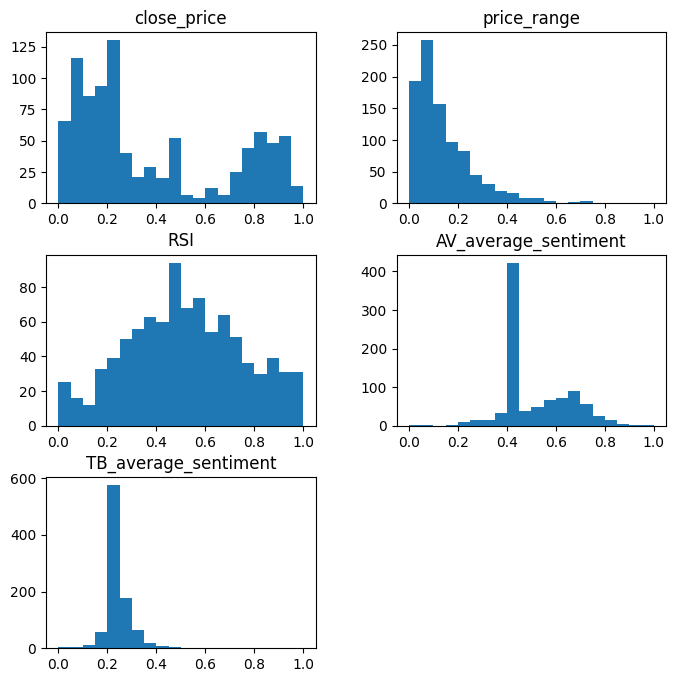

In [ ]:
check_distribution(final_df_btc)

**Insights**:

The distribution of Bitcoin's closing price reveals significant volatility, characterized by a wide range and several notable outliers, emphasizing its highly dynamic and speculative market behavior. The Relative Strength Index (RSI) values generally cluster around the mid-level of 50, indicating that Bitcoin frequently experiences neutral market conditions with sporadic episodes of overbought or oversold levels. Sentiment scores derived from both Alpha Vantage and TextBlob are evenly spread around neutral, reflecting the diverse and often mixed opinions prevalent within the cryptocurrency market.

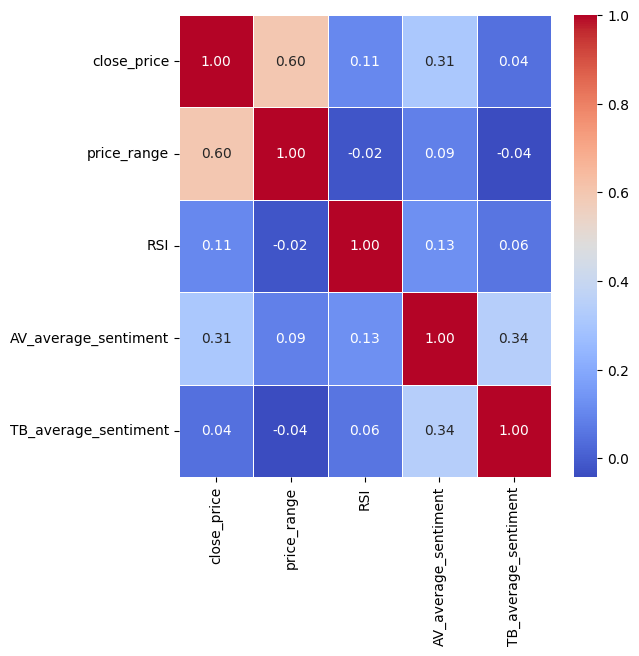

In [ ]:
check_correlation(final_df_btc)

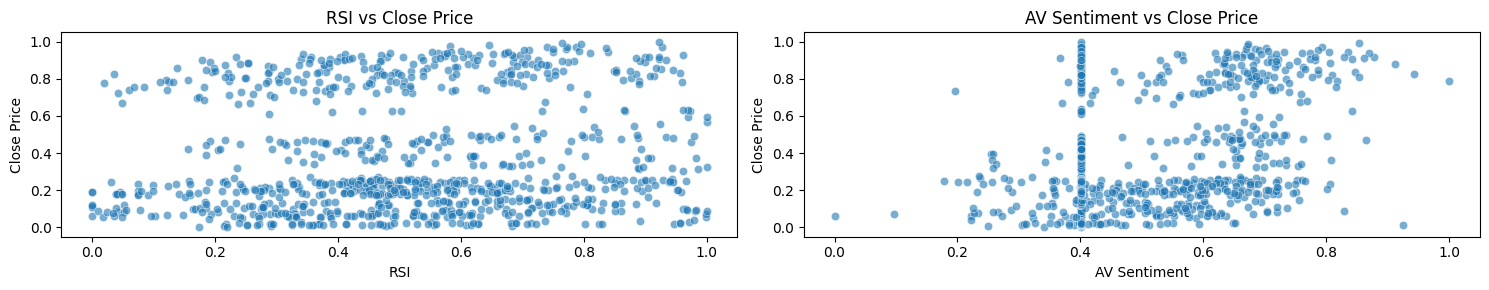

In [ ]:
check_scatter(final_df_btc)

**Insights**:

A moderate positive correlation (0.60) exists between closing price and price range, suggesting that larger price ranges are often observed alongside higher closing prices, a trend consistent with Bitcoin's erratic price swings. Conversely, the correlation between closing price and Alpha Vantage's daily average sentiment is weak (0.31), indicating that market sentiment as measured by news and text-based analysis exerts only a limited influence on Bitcoin's price. Scatterplots further illustrate this, showing no strong or consistent linear relationship between RSI, sentiment scores, and closing price.

#### **Univariate and Bivariate Analysis for Ethereum**

In [ ]:
numerical_columns = ['close_price', 'price_range', 'RSI', 'AV_average_sentiment', 'TB_average_sentiment']
display(final_df_eth[numerical_columns].describe())

,close_price,price_range,RSI,AV_average_sentiment,TB_average_sentiment
count,926.000000,926.000000,926.000000,926.000000,926.000000
mean,0.366612,0.147749,0.508746,0.459859,0.532448
std,0.236673,0.120316,0.231721,0.159095,0.093230
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200275,0.068637,0.335846,0.297907,0.483516
50%,0.285869,0.118475,0.492053,0.475109,0.515751
75%,0.516577,0.187473,0.682266,0.583966,0.579516
max,1.000000,1.000000,1.000000,1.000000,1.000000


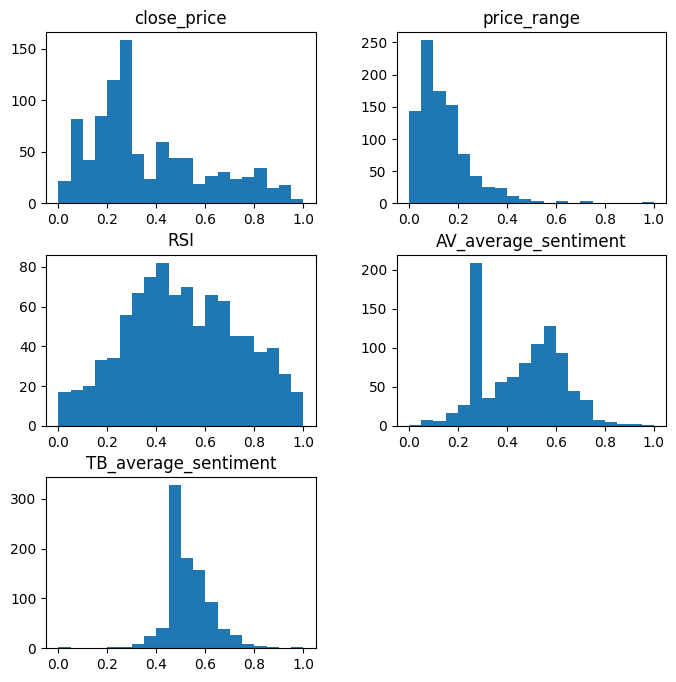

In [ ]:
check_distribution(final_df_eth)

**Insights**:

Ethereum's closing price distribution indicates less extreme volatility compared to Bitcoin, though it still experiences notable fluctuations with occasional outliers. The RSI values for Ethereum predominantly suggest market conditions near neutral, with occasional trends towards overbought levels, highlighting moments of strong buying pressure. Sentiment scores, particularly daily average sentiment from Alpha Vantage and TextBlob, are more balanced, with a slight lean toward positive sentiment compared to Bitcoin, indicating relatively optimistic market perceptions.

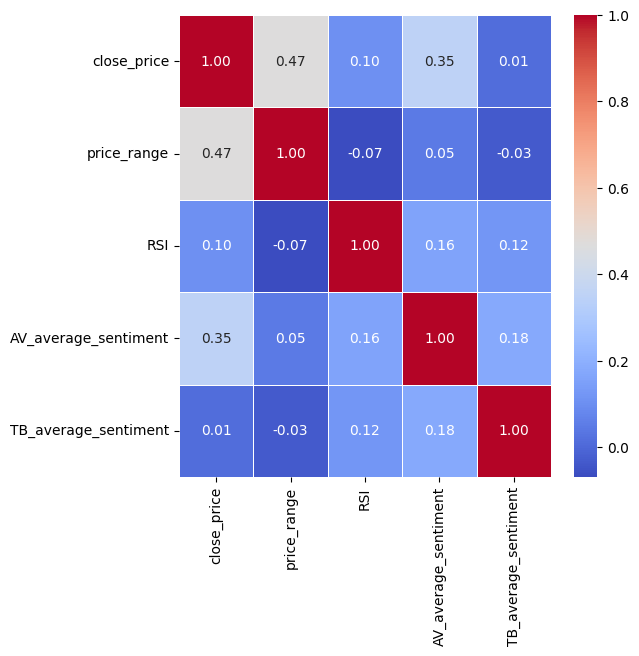

In [ ]:
check_correlation(final_df_eth)

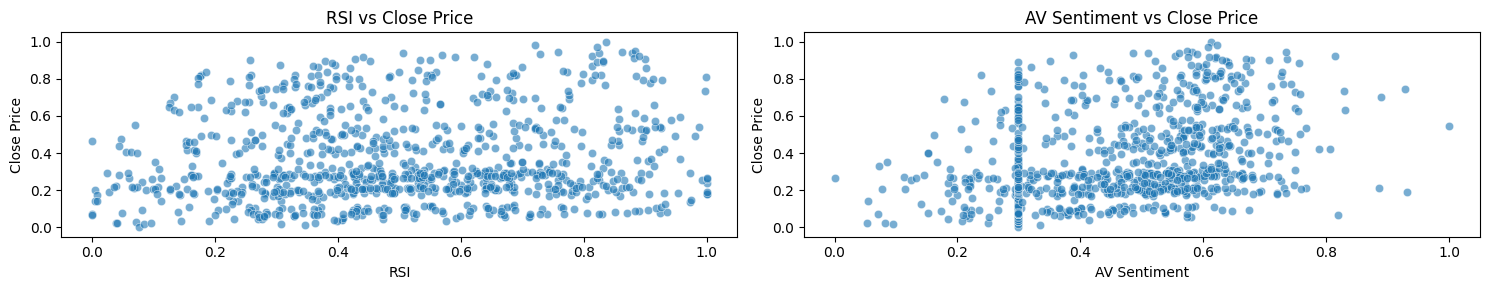

In [ ]:
check_scatter(final_df_eth)

**Insights**:

Ethereum demonstrates a moderate correlation (0.47) between closing price and price range, signifying that price range expands as the closing price rises, though this effect is less pronounced than in Bitcoin. The correlation between closing price and Alpha Vantage's daily average sentiment is weakly positive (0.35), implying a subtle influence of news sentiment on Ethereum's pricing. Scatterplots for Ethereum reinforce these findings, showing patterns similar to Bitcoin with no definitive predictive relationship between RSI, sentiment, and closing price.

#### **Univariate and Bivariate Analysis for Solana**

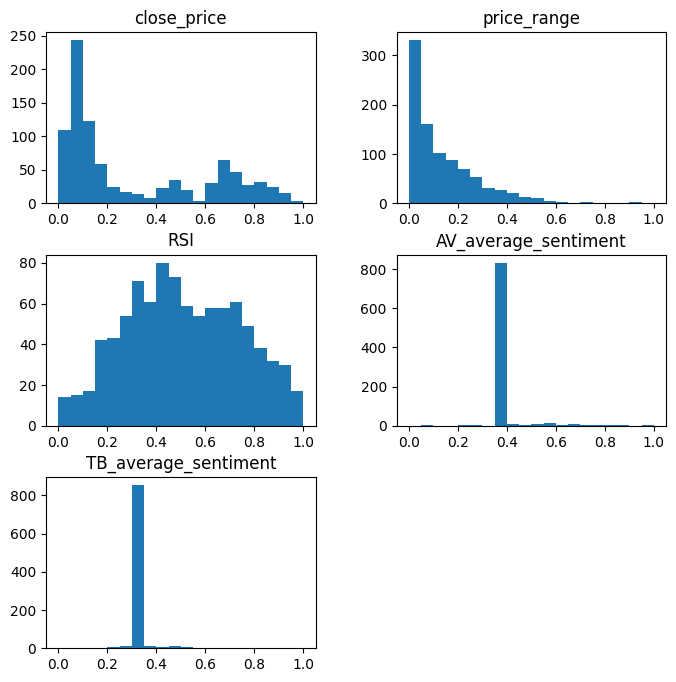

In [ ]:
check_distribution(final_df_sol)

**Insights**:

Solana's closing price distribution reveals a narrower price range and lower volatility compared to Bitcoin and Ethereum, reflecting a comparatively stable market profile. The RSI values for Solana indicate frequent neutral to mildly overbought conditions, suggesting a relatively steady and balanced trading environment. Daily average sentiment scores, particularly Alpha Vantage and TextBlob, tend to lean towards neutral to positive zones, reflecting an optimistic perception among market participants.

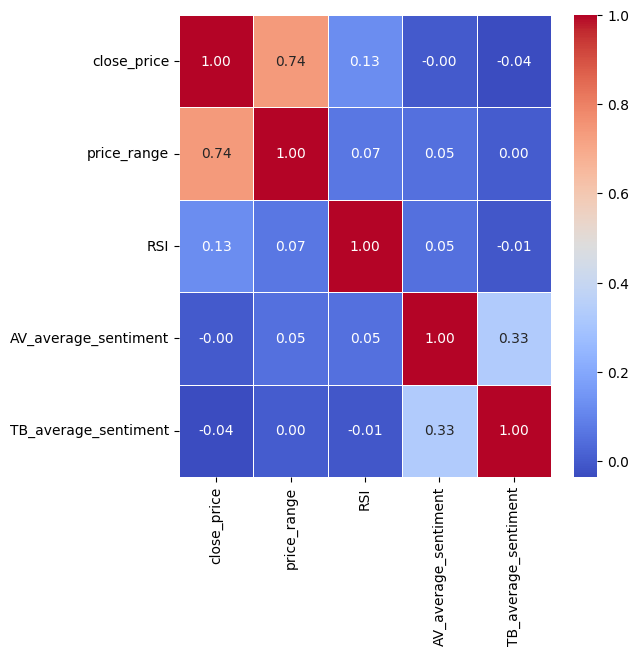

In [ ]:
check_correlation(final_df_sol)

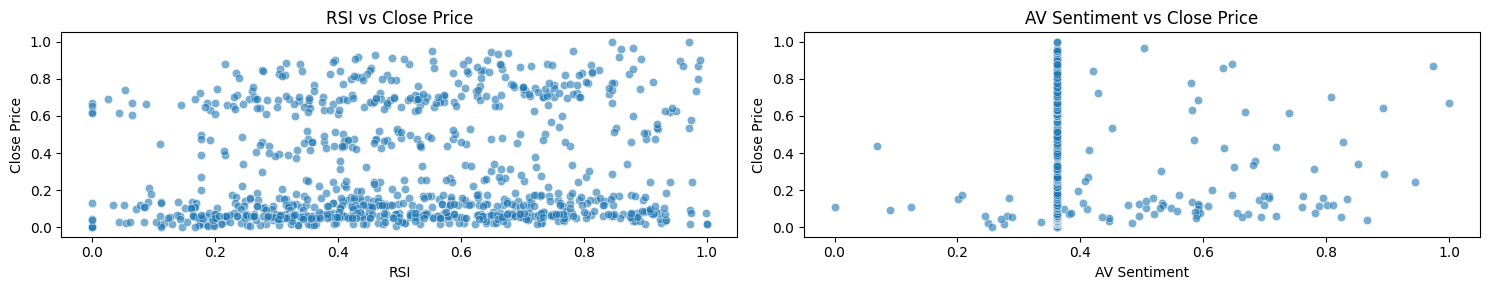

In [ ]:
check_scatter(final_df_sol)

**Insights**:

Solana exhibits a stronger correlation (0.74) between closing price and price range, indicating a closer relationship between its daily price movements and its closing prices compared to the other cryptocurrencies. Unlike Bitcoin and Ethereum, there is no significant correlation between closing price and sentiment scores, suggesting that sentiment metrics have a negligible impact on Solana's price. Scatterplots illustrate that RSI and sentiment scores are less influential on Solana's pricing than its price range.

### II. **Daily Average Sentiment**

In [299]:
def daily_avg_sentiment(crypto_id, name):
    df = pd.read_sql_query('SELECT * FROM News', conn)
    df = df[df['crypto_id'] == crypto_id].copy()
    df['date'] = pd.to_datetime(df['date'])
    df['day_of_week'] = df['date'].dt.dayofweek

    avg_sentiment_by_day = df.groupby('day_of_week')['sentiment'].mean().reset_index()
    avg_sentiment_by_day['day_name'] = avg_sentiment_by_day['day_of_week'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})

    highlight_day = avg_sentiment_by_day.loc[avg_sentiment_by_day['sentiment'].idxmax(), 'day_name']
    highlight_color = 'green'
    default_color = 'gray'

    colors = [highlight_color if day == highlight_day else default_color for day in avg_sentiment_by_day['day_name']]

    plt.figure(figsize=(15, 5))
    bars = plt.bar(avg_sentiment_by_day['day_name'], avg_sentiment_by_day['sentiment'], width=0.8, color=colors)

    for bar in bars:
        height = bar.get_height()
        if height == avg_sentiment_by_day['sentiment'].max():
            y_offset = height
            plt.text(bar.get_x() + bar.get_width() / 2, y_offset, f'{height:.2f}', ha='center', va='bottom')

    plt.xlabel("Day")
    plt.ylabel("Average Sentiment Score")
    plt.title(f"Average Sentiment by Day ({name})")
    plt.show()

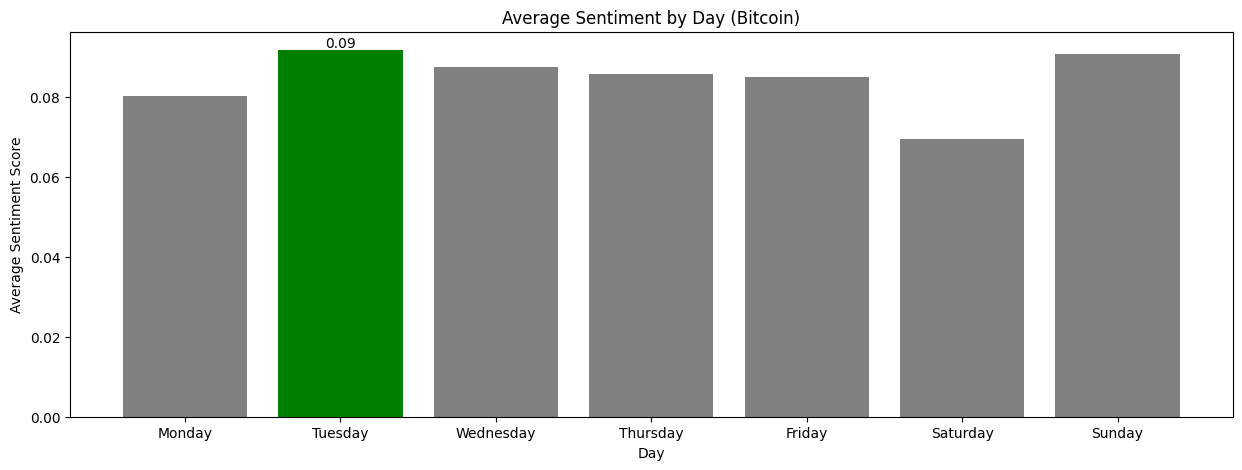

In [300]:
daily_avg_sentiment(1, 'Bitcoin')

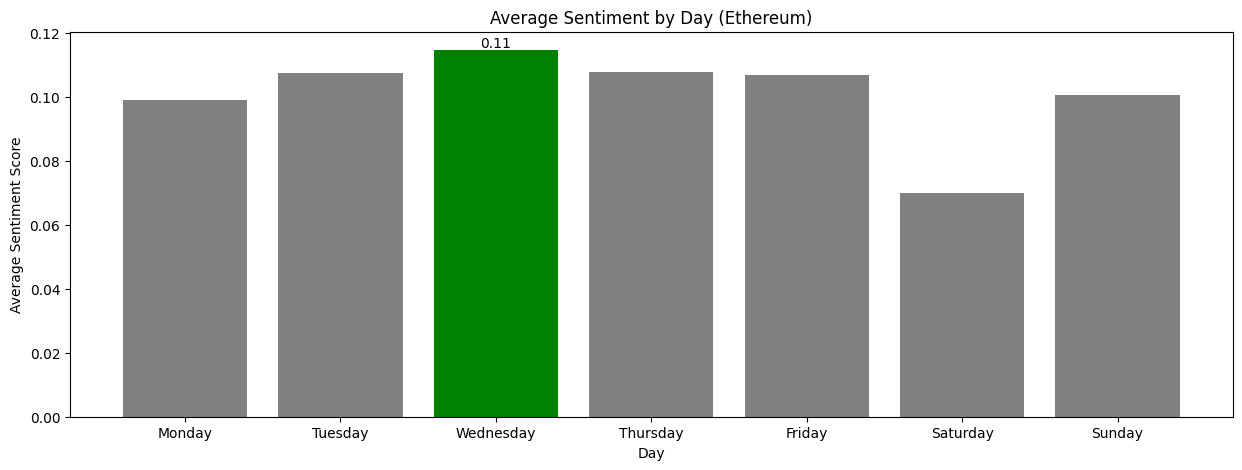

In [301]:
daily_avg_sentiment(2, 'Ethereum')

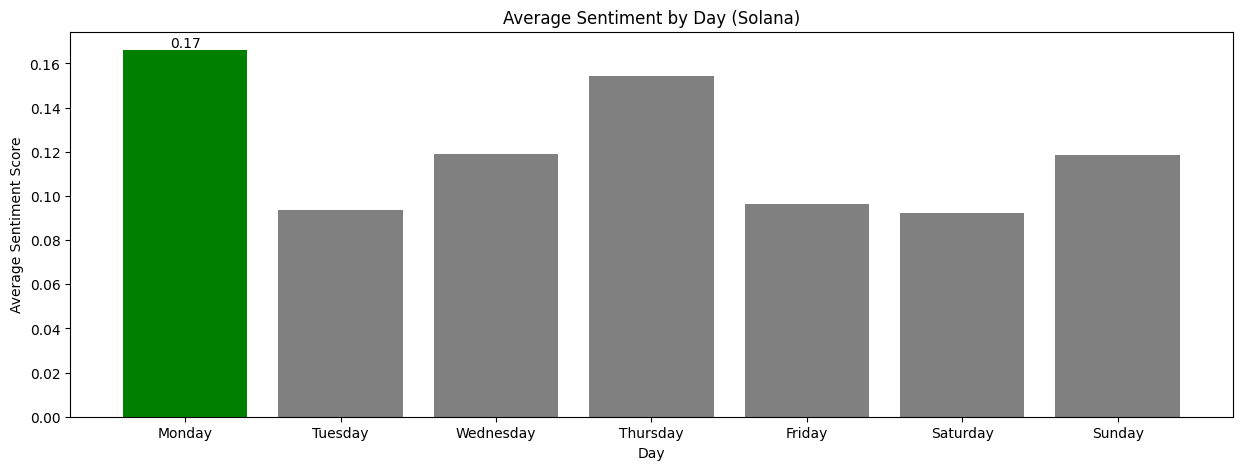

In [302]:
daily_avg_sentiment(3, 'Solana')

**Insights**:

With sentiment data from 2022 to 2024, Tuesday has had the highest average sentiment score of 0.09 for Bitcoin. However, there is almost no significant difference from the other days. For Ethereum, Wednesday holds the highest average sentiment score at 0.11, while for Solana, Monday has the highest score at 0.17. We also observed that these average scores fall under the category of low positive scores, indicating that, on average, these cryptocurrencies receive positive news coverage. Another insight is that, for all three cryptocurrencies, Saturday consistently shows the lowest average sentiment scores. This could either be a coincidence or a justifiable pattern that investors might want to consider in order to gain an edge in the market.

### III. **News Statistic**

In [ ]:
from datetime import datetime

def news_statistic(crypto_id, name):
    df = pd.read_sql_query('SELECT * FROM News', conn)
    df = df[df['crypto_id'] == crypto_id].copy()
    df['date'] = pd.to_datetime(df['date'])

    current_month = datetime.now().month
    current_year = datetime.now().year

    current_month_news = df[(df['date'].dt.year == current_year) & (df['date'].dt.month == current_month)]
    current_month_news_count = current_month_news.shape[0]

    current_year_news = df[df['date'].dt.year == current_year]
    current_year_news_count = current_year_news.shape[0]

    top_news_source_name = df['source'].value_counts().idxmax()

    print(f"Number of news articles published in the current month ({name}): {current_month_news_count}")
    print(f"Number of news articles published in the current year ({name}): {current_year_news_count}")
    print(f"Top news source name ({name}): {top_news_source_name}")

In [ ]:
news_statistic(1, 'Bitcoin')

Number of news articles published in the current month (Bitcoin): 0
Number of news articles published in the current year (Bitcoin): 1792
Top news source name (Bitcoin): Benzinga


In [ ]:
news_statistic(2, 'Ethereum')

Number of news articles published in the current month (Ethereum): 0
Number of news articles published in the current year (Ethereum): 1564
Top news source name (Ethereum): Benzinga


In [ ]:
news_statistic(3, 'Solana')

Number of news articles published in the current month (Solana): 0
Number of news articles published in the current year (Solana): 17
Top news source name (Solana): Benzinga


**Insights**:

We can see a significant gap in news coverage between Solana and both Bitcoin and Ethereum, with over 1,500 articles written about Bitcoin and Ethereum, and only 17 articles published so far about Solana. This can be explained by the fact that Bitcoin and Ethereum are two of the most well-known cryptocurrencies in the market today. In addition to the number of news articles, we also see that Benzinga, a well-known financial news outlet, is the top news source for all three cryptocurrencies.

### IV. **Sentiment Statistic**

In [311]:
import numpy as np

def sentiment_statistic(data, name):
    df = data.copy()

    sent_count_AV = df[['AV_sentiment_category_Strong Positive',
                        'AV_sentiment_category_Moderate Positive',
                        'AV_sentiment_category_Neutral',
                        'AV_sentiment_category_Moderate Negative',
                        'AV_sentiment_category_Strong Negative']].copy()
    sent_count_AV.rename(columns={'AV_sentiment_category_Strong Positive': 'Strong Positive',
                                  'AV_sentiment_category_Moderate Positive': 'Moderate Positive',
                                  'AV_sentiment_category_Neutral': 'Neutral',
                                  'AV_sentiment_category_Moderate Negative': 'Moderate Negative',
                                  'AV_sentiment_category_Strong Negative': 'Strong Negative'}, inplace=True)
    sent_count_TB = df[['TB_sentiment_category_Strong Positive',
                        'TB_sentiment_category_Moderate Positive',
                        'TB_sentiment_category_Neutral',
                        'TB_sentiment_category_Moderate Negative',
                        'TB_sentiment_category_Strong Negative']].copy()
    sent_count_TB.rename(columns={'TB_sentiment_category_Strong Positive': 'Strong Positive',
                                  'TB_sentiment_category_Moderate Positive': 'Moderate Positive',
                                  'TB_sentiment_category_Neutral': 'Neutral',
                                  'TB_sentiment_category_Moderate Negative': 'Moderate Negative',
                                  'TB_sentiment_category_Strong Negative': 'Strong Negative'}, inplace=True)
    sent_count_AV = sent_count_AV.sum(axis=0)
    sent_count_TB = sent_count_TB.sum(axis=0)
    sentiment_counts_AV = sent_count_AV.reset_index()
    sentiment_counts_TB = sent_count_TB.reset_index()
    sentiment_counts_AV.columns = ['sentiment', 'count']
    sentiment_counts_TB.columns = ['sentiment', 'count']
    sentiment_counts_AV['set'] = 'Alpha Vantage'
    sentiment_counts_TB['set'] = 'TextBlob'

    final_df = pd.concat([sentiment_counts_AV, sentiment_counts_TB], axis=0)

    df_pivot = final_df.pivot(index='set', columns='sentiment', values='count')

    fig, ax = plt.subplots(figsize=(10, 6))

    bar_width = 0.15
    index = np.arange(len(df_pivot))

    for i, sentiment in enumerate(df_pivot.columns):
        bars = ax.bar(index + i * bar_width, df_pivot[sentiment], bar_width, label=sentiment)

        for bar in bars:
            height = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + 1,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=10
            )

    ax.set_xlabel('Sentiment Source')
    ax.set_ylabel('Count')
    ax.set_title(f'Sentiment Category Counts by Sentiment Source ({name})')
    ax.set_xticks(index + bar_width * 2)
    ax.set_xticklabels(df_pivot.index)
    ax.legend(title='Sentiment Category')

    plt.tight_layout()
    plt.show()

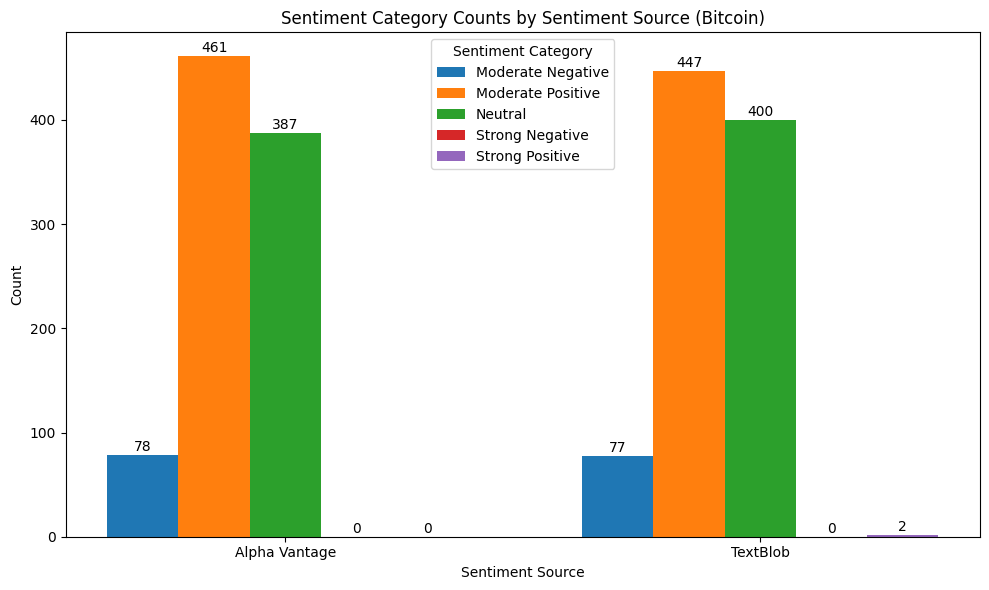

In [312]:
sentiment_statistic(final_df_btc, 'Bitcoin')

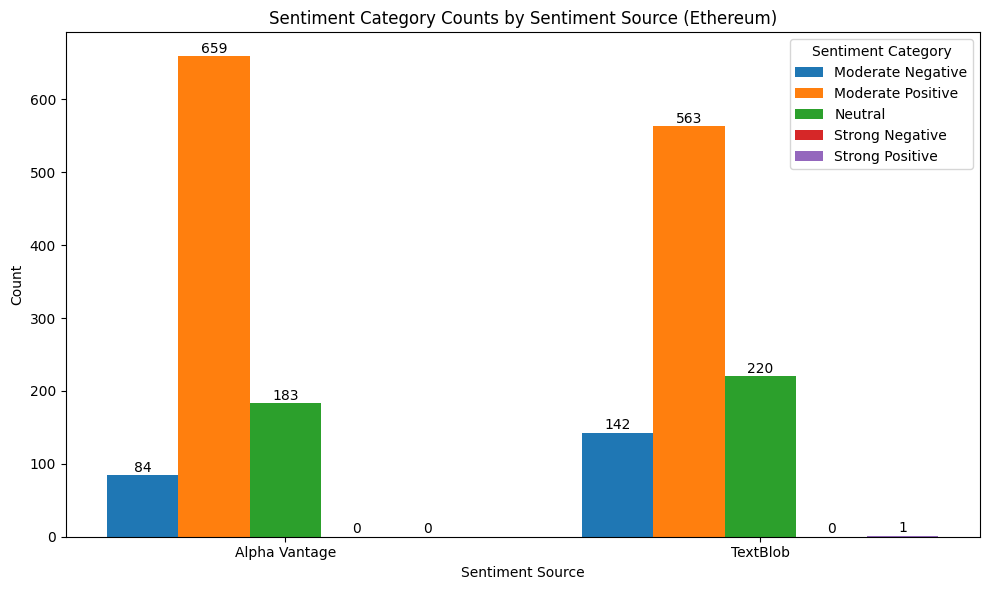

In [313]:
sentiment_statistic(final_df_eth, 'Ethereum')

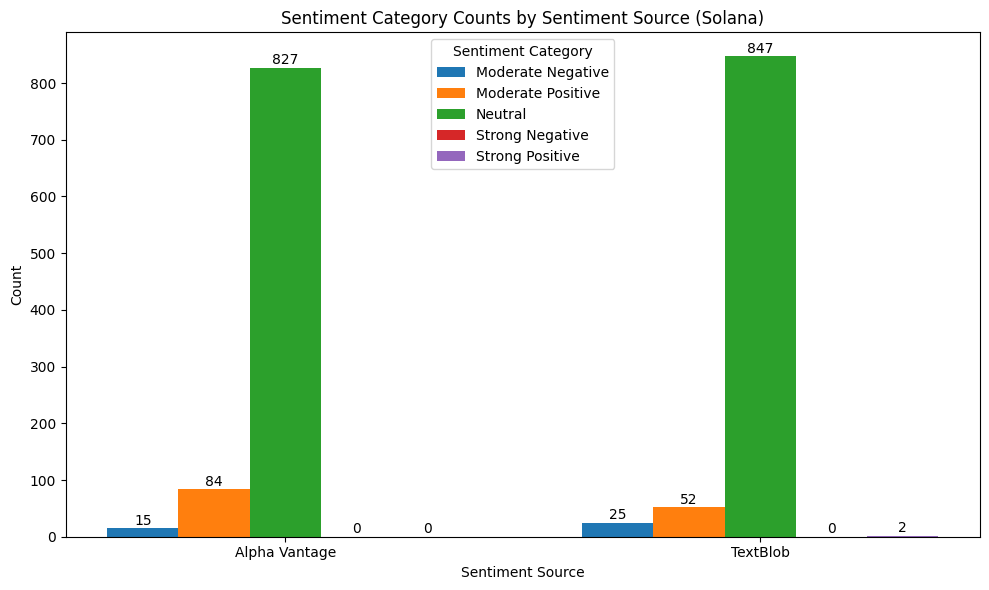

In [314]:
sentiment_statistic(final_df_sol, 'Solana')

**Insights:**

We can observe that the sentiment category counts from Alpha Vantage and the derived sentiment using TextBlob have almost identical structures. Both show moderate positive and neutral as the top two highest categories for Bitcoin and Ethereum, with neutral being the highest for Solana. This suggests that Alpha Vantage's sentiment scores, which focus on financial and market-related sentiment, and TextBlob's sentiment scores, which are based on general linguistic analysis, are closely related. This also implies that both sentiment sources could be potential indicators in the machine learning task and can be further tested for performance.

### V. **Annual Sentiment Heatmap**

In [280]:
def create_heatmap(crypto_id, year, name):
    heatmap_df = pd.read_sql_query('SELECT * FROM News', conn)
    heatmap_df = heatmap_df[heatmap_df['crypto_id'] == crypto_id].copy()

    heatmap_df['date'] = pd.to_datetime(heatmap_df['date'])
    heatmap_df = heatmap_df[heatmap_df['date'].dt.year == year]
    daily_sentiment = heatmap_df.groupby(heatmap_df['date'].dt.date).agg({'sentiment': 'mean'}).reset_index()

    daily_sentiment['date'] = pd.to_datetime(daily_sentiment['date'])
    daily_sentiment['day'] = daily_sentiment['date'].dt.day
    daily_sentiment['month'] = daily_sentiment['date'].dt.month_name()

    month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    daily_sentiment['month'] = pd.Categorical(daily_sentiment['month'], categories=month_order, ordered=True)

    heatmap_data = daily_sentiment.pivot_table(index='month', columns='day', values='sentiment', aggfunc='mean', observed=False)

    plt.figure(figsize=(15, 6))
    sns.heatmap(
        heatmap_data,
        cmap='coolwarm',
        annot=False,
        cbar_kws={'label': 'Sentiment Score'}
    )

    plt.title(f'Annual Sentiment Heatmap - {name} - {year}')
    plt.xlabel(None)
    plt.ylabel(None)

    plt.tight_layout()
    plt.show()

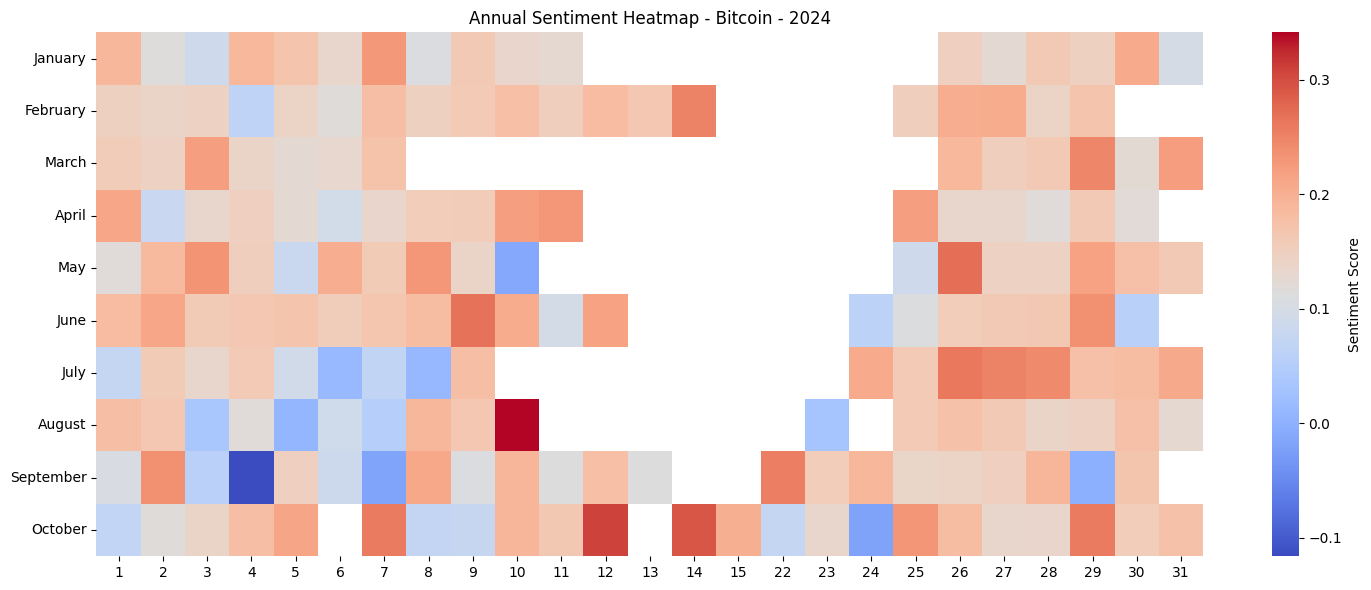

In [281]:
create_heatmap(1, 2024, "Bitcoin")

**Insights**:

One notable observation in Bitcoin's sentiment heatmap is the gap around days 12-23 at the beginning and middle of this year, suggesting that news coverage was generally unavailable during these periods. Additionally, sentiment scores have been neutral to moderately positive over the past month, indicating a potentially bullish year for Bitcoin.

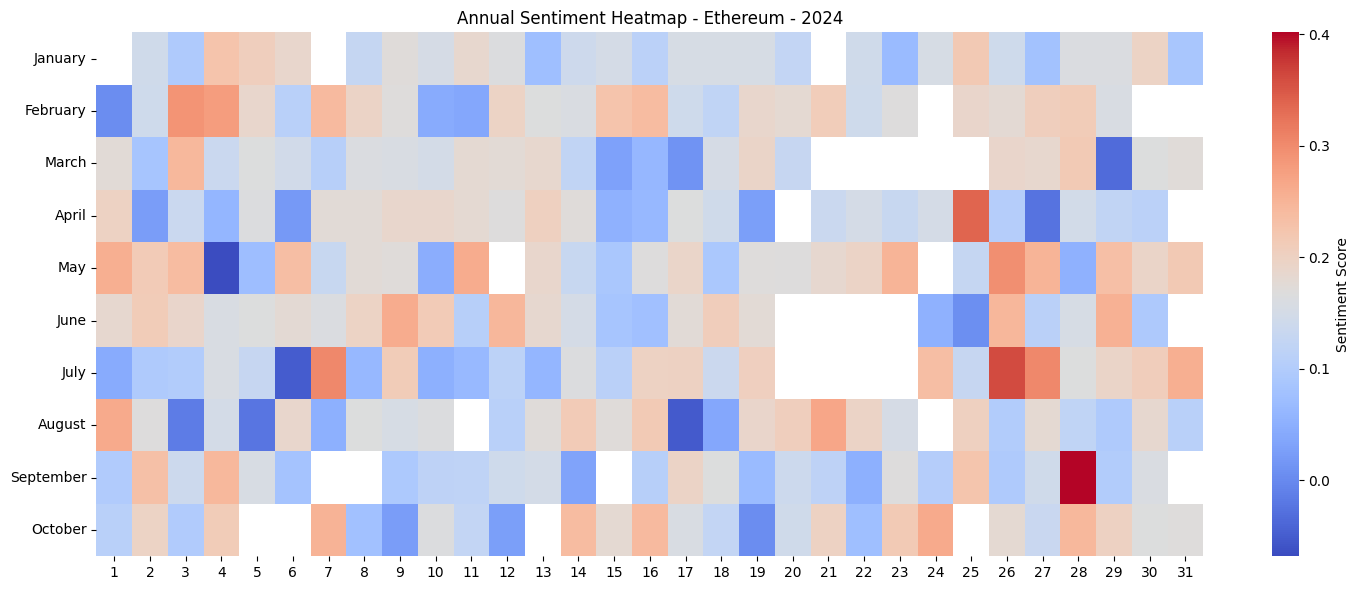

In [282]:
create_heatmap(2, 2024, "Ethereum")

**Insights**:

Unlike Bitcoin's heatmap, Ethereum's sentiment heatmap displays a chaotic mix of scores, ranging from low to moderately positive sentiment. Additionally, there are no significant gaps in news coverage, suggesting that Ethereum has had news almost every day this year.

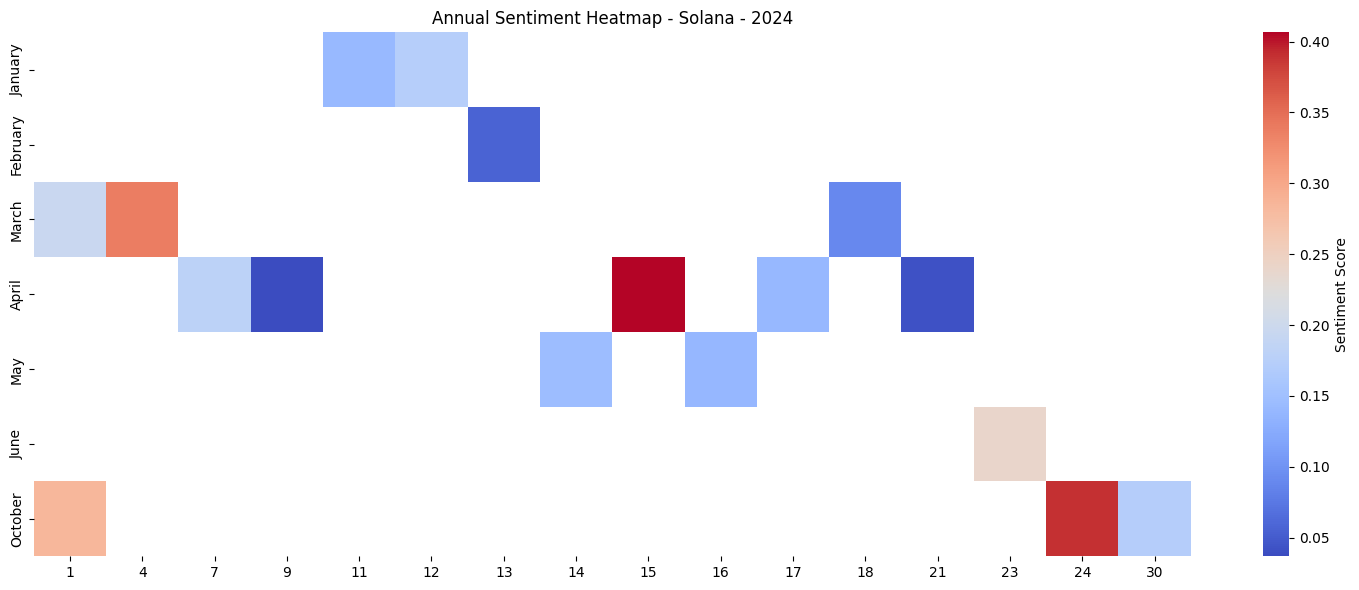

In [283]:
create_heatmap(3, 2024, "Solana")

**Insights**:

This year has been relatively quiet for Solana, with fewer than 20 news articles over the past few months. However, we can see that all of these articles are positive, indicating a gradual bullish movement.

## B. **Machine Learning Modeling**

### I. **Create the Predict and Backtest Function**

The **Predict Function** generates price movement predictions and confidence scores for a specific test set, while the **Backtest Function** applies this prediction process iteratively, simulating real-world conditions where the model evaluates new data daily. These functions are essential for assessing the performance of a machine learning model designed to predict cryptocurrency price movements using news sentiment.

#### **Predict Function**

**Parameters**:

- **train** - The training set containing features and target variable.
- **test** - The test set containing features and target variable.
- **predictors** - A list of feature names used for prediction.
- **model** - The machine learning model to be trained and tested.

**Returns**: A DataFrame containing the true target values, binary predictions (1 or 0), and prediction confidence scores (probabilities).

#### **Backtest Function**

**Parameters**:

- **data** - The complete dataset containing features and target variable.
- **model** - The machine learning model to be applied.
- **predictors** - A list of feature names used for prediction.

**Returns**: A DataFrame containing all the predictions across the backtest iterations, including true target values and confidence scores.

In [ ]:
def predict(train, test, predictors, model):
    # Train the Model
    model.fit(train[predictors], train["target"])

    # Predict Probabilities for the Positive Class
    preds = model.predict_proba(test[predictors])[:,1]

    # Create Confidence Scores
    conf = pd.Series(preds, index=test.index, name="confidence")

    # Convert Probabilities to Binary Predictions
    binary_preds = (preds >= 0.6).astype(int)
    binary_preds = pd.Series(binary_preds, index=test.index, name="prediction")

    # Combine Target, Predictions, and Confidence Scores
    combined = pd.concat([test["target"], binary_preds, conf], axis=1)
    return combined

def backtest(data, model, predictors):
    all_predictions = []

    # Start with 365 days of Training Data
    for i in range(365, data.shape[0], 1):

        # Define Training and Test Sets
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+1)].copy()

        # Generate Predictions
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    # Combine All Predictions Into a Single DataFrame
    combined = pd.concat(all_predictions)
    return combined

### II. **Initialize Predictors and Classifiers**

#### **Predictors**:

We defined two sets of predictors to evaluate how each sentiment analysis method (Alpha Vantage vs. TextBlob) influences the model's performance. The Alpha Vantage sentiment scores focus on financial and market-related sentiment, which may provide a more direct reflection of market trends. On the other hand, TextBlob sentiment scores offer a more general linguistic analysis, capturing the sentiment of text data in a broader context. By using these two different methods, we aim to compare how sentiment derived from financial news (Alpha Vantage) versus broader text sentiment (TextBlob) affects the predictive accuracy of the models.

#### **Classifiers**:

- **KNN (K-Nearest Neighbors)** - A non-parametric method used for classification based on the majority vote from the nearest neighbors of a data point.
- **Logistic Regression** - A simple and interpretable model used for binary classification tasks.
- **Random Forest** - An ensemble method using multiple decision trees to improve accuracy and avoid overfitting.
- **Gradient Boosting** - Another ensemble technique that builds trees sequentially to reduce bias and improve predictions.
- **XGBoost** - An efficient and scalable implementation of gradient boosting, known for its performance in machine learning competitions.
- **SVM (Support Vector Machine)** - A supervised learning model that finds the hyperplane that best separates different classes in the feature space.
- **Ensemble Methods** - A group of methods that combine multiple models to improve performance, including techniques like stacking, bagging, and boosting.

By defining these classifiers, we will evaluate and compare their performance using the two different sets of predictors (AV and TB). This approach will allow us to understand how each classifier performs with sentiment features from Alpha Vantage (AV) versus TextBlob (TB). By testing multiple models, we can determine which classifier is best suited for predicting cryptocurrency price movements based on sentiment analysis, and whether one set of predictors outperforms the other in terms of prediction accuracy and reliability. This comparison will provide insights into the most effective model for this specific prediction task.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# List All Predictors (with Alpha Vantage Sentiment Scores)
AV_predictors = final_df_btc.drop(['target', 'TB_average_sentiment', 'TB_sentiment_category_Strong Negative',
                                   'TB_sentiment_category_Strong Positive', 'TB_sentiment_category_Neutral',
                                   'TB_sentiment_category_Moderate Negative', 'TB_sentiment_category_Moderate Positive'], axis=1).columns.to_list()

# List All Predictors (with TextBlob Sentiment Scores)
TB_predictors = final_df_btc.drop(['target', 'AV_average_sentiment', 'AV_sentiment_category_Strong Negative',
                                   'AV_sentiment_category_Strong Positive', 'AV_sentiment_category_Neutral',
                                   'AV_sentiment_category_Moderate Negative', 'AV_sentiment_category_Moderate Positive'], axis=1).columns.to_list()

# List All Classifiers
xgb_model = XGBClassifier(random_state=42, learning_rate=.1, n_estimators=200)
knn_model = KNeighborsClassifier(n_neighbors=10)
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
lr_model = LogisticRegression(max_iter=5000, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
ensemble_model = VotingClassifier(estimators=[('random_forest', rf_model),
                                              ('gradient_boosting', gb_model),
                                              ('logistic_regression', lr_model)],
                                  voting='soft')

classifiers = {
    'KNN': knn_model,
    'Logistic Regression': lr_model,
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model,
    'XGBoost': xgb_model,
    'SVM': svm_model,
    'Ensemble': ensemble_model
}

### III. **Feature Selection using Correlation Analysis**

The **Feature Selection Function** helps refine a dataset by selecting features that have a significant correlation with the target variable while removing features that exhibit high multicollinearity. By reducing redundancy and focusing on impactful predictors, it improves the effectiveness of machine learning models.

#### **Feature Selection Function**

**Parameters**:

- **data** - The dataset containing predictors and the target variable.
- **predictors** - A list of feature names to consider for selection.
- **target_column** - The name of the column representing the target variable.
- **threshold** - The correlation threshold to identify and remove multicollinear features.

**Returns**: A list of feature names selected for their relevance and low multicollinearity.

**Process**:

1. **Drop the Date Column:** The date column is removed from the dataset, as it is typically not used for feature selection.
2. **Subset the Data:** The dataset is filtered to retain only the predictor variables and the target column.
3. **Calculate the Correlation Matrix:** A correlation matrix is computed to assess relationships between all features and the target variable.
4. **Select Features Correlated with the Target:** Features with the highest correlation to the target variable are selected initially, sorted in descending order of their absolute correlation.
5. **Remove Multicollinear Features:** For each pair of selected features, if the absolute correlation exceeds the specified threshold, the less relevant feature (higher multicollinearity) is removed.
6. **Return Selected Features:** The final list of selected features is returned after removing those with high multicollinearity.

In [ ]:
def feature_selection(data, predictors, target_column, threshold=0.8):
    # Select Subset
    data = data[predictors + [target_column]]

    # Calculate the Correlation Matrix
    corr_matrix = data.corr()

    # Correlation with the Target Variable
    target_corr = corr_matrix[target_column].drop(target_column)
    target_corr_sorted = target_corr.abs().sort_values(ascending=False)

    # Start with Features that have the Highest Correlation with the Target
    selected_features = list(target_corr_sorted.index)

    # Remove Multicollinear Features
    to_remove = set()
    for i in range(len(selected_features)):
        if selected_features[i] in to_remove:
            continue
        for j in range(i + 1, len(selected_features)):
            # Check if the Features are Highly Correlated
            if abs(corr_matrix[selected_features[i]][selected_features[j]]) > threshold:
                to_remove.add(selected_features[j])

    # Final Selected Features
    selected_features = [feature for feature in selected_features if feature not in to_remove]

    return selected_features

### IV. **Train the Models**

The **Training Function** evaluates the performance of multiple machine learning classifiers on a given dataset by calculating key evaluation metrics such as accuracy, precision, and total errors. It iterates over the list of classifiers, using the provided predictors to train and test each model, and then stores the results for comparison.

#### **Training Function**

**Parameters**:

- **data** - The dataset containing the features and target variable to be used for training and evaluation.
- **predictors** - A list of feature names used for training the classifiers.
- **classifiers** - A dictionary of classifiers with their names and instances.

**Returns**: A sorted DataFrame containing the evaluation metrics for each classifier.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def training(data, predictors, classifiers):
    # Initialize Dictionary to Store Results
    results = {
        'Classifier': [],
        'Accuracy': [],
        'Precision': [],
        'Recall': [],
        'F1 Score': [],
        'Total Errors': []
    }

    # Iterate Over Classifiers
    for clf_name, clf in classifiers.items():

        # Backtest using the Current Predictors
        preds = backtest(data, clf, predictors)

        # Calculate Evaluation Metrics
        accuracy = accuracy_score(preds["target"], preds["predictions"])
        precision = precision_score(preds["target"], preds["predictions"], zero_division=0)
        recall = recall_score(preds["target"], preds["predictions"])
        f1 = f1_score(preds["target"], preds["predictions"])
        errors = (preds["target"] != preds["predictions"]).sum()

        # Store Results
        results['Classifier'].append(clf_name)
        results['Accuracy'].append(accuracy)
        results['Precision'].append(precision)
        results['Recall'].append(recall)
        results['F1 Score'].append(f1)
        results['Total Errors'].append(errors)

    # Create a DataFrame from Results
    results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
    return results_df

In [ ]:
print("(BTC) Training Result with Alpha Vantage Sentiment Scores:")
display(training(final_df_btc, feature_selection(final_df_btc, AV_predictors, 'target'), classifiers))

(BTC) Training Result with Alpha Vantage Sentiment Scores:


,Classifier,Accuracy,Precision,Recall,F1 Score,Total Errors
0,XGBoost,0.502674,0.516432,0.384615,0.440882,279
1,Gradient Boosting,0.493761,0.506757,0.262238,0.345622,284
2,Logistic Regression,0.491979,0.526316,0.034965,0.065574,285
3,SVM,0.490196,0.000000,0.000000,0.000000,286
4,KNN,0.477718,0.487273,0.468531,0.477718,293
5,Ensemble,0.472371,0.444444,0.139860,0.212766,296
6,Random Forest,0.461676,0.448052,0.241259,0.313636,302


In [ ]:
print("(BTC) Training Result with TextBlob Sentiment Scores:")
display(training(final_df_btc, feature_selection(final_df_btc, TB_predictors, 'target'), classifiers))

(BTC) Training Result with TextBlob Sentiment Scores:


,Classifier,Accuracy,Precision,Recall,F1 Score,Total Errors
0,XGBoost,0.500891,0.513889,0.388112,0.442231,280
1,Ensemble,0.497326,0.526316,0.139860,0.220994,282
2,Random Forest,0.490196,0.500000,0.241259,0.325472,286
3,SVM,0.490196,0.000000,0.000000,0.000000,286
4,KNN,0.481283,0.490566,0.454545,0.471869,291
5,Logistic Regression,0.479501,0.411765,0.048951,0.087500,292
6,Gradient Boosting,0.470588,0.463576,0.244755,0.320366,297


In [ ]:
print("(ETH) Training Result with Alpha Vantage Sentiment Scores:")
display(training(final_df_eth, feature_selection(final_df_eth, AV_predictors, 'target'), classifiers))

(ETH) Training Result with Alpha Vantage Sentiment Scores:


,Classifier,Accuracy,Precision,Recall,F1 Score,Total Errors
0,XGBoost,0.531194,0.556075,0.414634,0.475050,263
1,Gradient Boosting,0.520499,0.554217,0.320557,0.406181,269
2,KNN,0.516934,0.528571,0.515679,0.522046,271
3,Ensemble,0.506239,0.552083,0.184669,0.276762,277
4,Random Forest,0.504456,0.530612,0.271777,0.359447,278
5,Logistic Regression,0.488414,0.000000,0.000000,0.000000,287
6,SVM,0.488414,0.000000,0.000000,0.000000,287


In [ ]:
print("(ETH) Training Result with TextBlob Sentiment Scores:")
display(training(final_df_eth, feature_selection(final_df_eth, TB_predictors, 'target'), classifiers))

(ETH) Training Result with TextBlob Sentiment Scores:


,Classifier,Accuracy,Precision,Recall,F1 Score,Total Errors
0,XGBoost,0.508021,0.525822,0.390244,0.448000,276
1,Gradient Boosting,0.502674,0.528571,0.257840,0.346604,279
2,Ensemble,0.497326,0.536232,0.128920,0.207865,282
3,SVM,0.488414,0.000000,0.000000,0.000000,287
4,KNN,0.486631,0.498024,0.439024,0.466667,288
5,Logistic Regression,0.483066,0.363636,0.013937,0.026846,290
6,Random Forest,0.472371,0.469388,0.240418,0.317972,296


In [ ]:
print("(SOL) Training Result with Alpha Vantage Sentiment Scores:")
display(training(final_df_sol, feature_selection(final_df_sol, AV_predictors, 'target'), classifiers))

(SOL) Training Result with Alpha Vantage Sentiment Scores:


,Classifier,Accuracy,Precision,Recall,F1 Score,Total Errors
0,KNN,0.491979,0.500000,0.491228,0.495575,285
1,SVM,0.491979,0.000000,0.000000,0.000000,285
2,Logistic Regression,0.488414,0.250000,0.003509,0.006920,287
3,XGBoost,0.486631,0.493088,0.375439,0.426295,288
4,Random Forest,0.472371,0.467066,0.273684,0.345133,296
5,Gradient Boosting,0.472371,0.457364,0.207018,0.285024,296
6,Ensemble,0.472371,0.430380,0.119298,0.186813,296


In [ ]:
print("(SOL) Training Result with TextBlob Sentiment Scores:")
display(training(final_df_sol, feature_selection(final_df_sol, TB_predictors, 'target'), classifiers))

(SOL) Training Result with TextBlob Sentiment Scores:


,Classifier,Accuracy,Precision,Recall,F1 Score,Total Errors
0,KNN,0.497326,0.505495,0.484211,0.494624,282
1,SVM,0.491979,0.000000,0.000000,0.000000,285
2,Logistic Regression,0.488414,0.250000,0.003509,0.006920,287
3,Gradient Boosting,0.484848,0.484615,0.221053,0.303614,289
4,XGBoost,0.484848,0.490826,0.375439,0.425447,289
5,Ensemble,0.475936,0.444444,0.126316,0.196721,294
6,Random Forest,0.458111,0.440994,0.249123,0.318386,304


Upon training the classifiers with the two sets of predictors, the following are the top-performing classifiers in terms of accuracy for each cryptocurrency:

**Bitcoin**
- XGBoost - 50.26% (Alpha Vantage)
- XGBoost - 50.08% (TextBlob)

**Ethereum**
- XGBoost - 53.11% (Alpha Vantage)
- XGBoost - 50.80% (TextBlob)

**Solana**
- KNN - 49.19% (Alpha Vantage)
- KNN - 49.73% (TextBlob)

We observed that Alpha Vantage sentiment scores performed better for Ethereum and Bitcoin, whereas TextBlob sentiment scores were more effective for Solana. It is also noteworthy that all top classifiers achieved precision scores above 49%. However, these results are still inadequate. There are two possible explanations: either the data is insufficient to produce more accurate results, or the selected classifiers are not well-suited for this task.

### V. **Improve the Accuracy**

There are four ways we can implement to improve the accuracies of the classifiers:

1. **Oversampling**: Increasing the representation of underrepresented classes in the dataset can help improve the model's ability to learn from all classes equally.
2. **Adding Lagged Features**: Including past values of the target variable or features can provide the model with temporal context, improving its prediction accuracy.
3. **Adding Time-Based Features**: Introducing time-related features, such as day of the week or month, can help the model capture trends and patterns influenced by time.
4. **Adding Ratio and Trend Features**: Creating new features that capture the ratio between different variables or the trend over time can provide the model with additional insights, enhancing its ability to recognize underlying patterns in the data.

**Improving the Backtest Function with Oversampling**

By using SMOTE (Synthetic Minority Oversampling Technique), we will increase the number of cases in the dataset to balance the distribution of the target variable.

In [ ]:
from imblearn.over_sampling import SMOTE

def backtest_with_oversampling(data, model, predictors):
    all_predictions = []

    # Initialize SMOTE
    smote = SMOTE(random_state=42)

    # Start with 365 days of Training Data
    for i in range(365, data.shape[0], 1):

        # Define Training and Test Sets
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+1)].copy()

        # Apply SMOTE to the Training Set
        X_train = train[predictors]
        y_train = train["target"]
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

        # Combine Resampled Data Back for Consistency
        train_resampled = X_train_resampled.copy()
        train_resampled["target"] = y_train_resampled

        # Generate Predictions using Resampled Training Set
        predictions = predict(train_resampled, test, predictors, model)
        all_predictions.append(predictions)

    # Combine All Predictions Into a Single DataFrame
    combined = pd.concat(all_predictions)
    return combined

**Adding New Features to the Dataset**

By incorporating lagged features (past values), time-based features (such as the day of the week or month), and ratio and trend features, we provide the model with additional temporal context, which can improve its ability to capture time-dependent patterns.

In [ ]:
def add_features(data):
    # Add Lagged Features
    lags = [1, 2, 3]
    for lag in lags:
        data[f'close_price_lag_{lag}'] = data['close_price'].shift(lag)
        data[f'AV_sentiment_lag_{lag}'] = data['AV_average_sentiment'].shift(lag)
        data[f'TB_sentiment_lag_{lag}'] = data['TB_average_sentiment'].shift(lag)

    # Add Time-Based Features
    data['date'] = pd.to_datetime(data.index)
    data['day_of_week'] = data['date'].dt.dayofweek
    data['month'] = data['date'].dt.month
    data['is_weekend'] = data['day_of_week'].isin([5, 6]).astype(int)

    # Add Ratio and Trend Features
    data_copy = data.drop(columns=['date'])
    horizons = [4,13,26,52,208]
    for horizon in horizons:
      rolling_averages = data_copy.rolling(horizon).mean()
      ratio_column = f"close_ratio_{horizon}"
      data[ratio_column] = data["close_price"] / rolling_averages["close_price"]
      trend_column = f"trend_{horizon}"
      data[trend_column] = data_copy.shift(1).rolling(horizon).sum()["target"]

    # Drop Null Values
    data = data.dropna().reset_index(drop=True)

    # Set Date as Index
    data.set_index('date', inplace=True)

    # Scale Numerical Features
    scaler = MinMaxScaler()
    columns_to_scale = ['day_of_week', 'month']
    data[columns_to_scale] = data[columns_to_scale].astype(float)
    data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

    return data

**Improving the Training Function with the New Backtest Function**

By integrating the improved backtest function, which includes oversampling, we will enhance the evaluation process, allowing for more accurate performance assessments and better generalization of the model.

In [ ]:
def retraining(data, predictors, classifiers):
    # Initialize Dictionary to Store Results
    results = {
        'Classifier': [],
        'Accuracy': [],
        'Precision': [],
        'Recall': [],
        'F1 Score': [],
        'Total Errors': []
    }

    # Iterate Over Classifiers
    for clf_name, clf in classifiers.items():

        # Backtest with Oversampling
        preds = backtest_with_oversampling(data, clf, predictors)

        # Calculate Evaluation Metrics
        accuracy = accuracy_score(preds["target"], preds["predictions"])
        precision = precision_score(preds["target"], preds["predictions"], zero_division=0)
        recall = recall_score(preds["target"], preds["predictions"])
        f1 = f1_score(preds["target"], preds["predictions"])
        errors = (preds["target"] != preds["predictions"]).sum()

        # Store Results
        results['Classifier'].append(clf_name)
        results['Accuracy'].append(accuracy)
        results['Precision'].append(precision)
        results['Recall'].append(recall)
        results['F1 Score'].append(f1)
        results['Total Errors'].append(errors)

    # Create a DataFrame from Results
    results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
    return results_df

**Initializing Improved Predictors**

By creating new predictors that include lagged and time-based features, we will provide the model with richer and more relevant information to enhance its predictive accuracy.

In [ ]:
# List All New Predictors (with Alpha Vantage Sentiment Scores)
AV_new_predictors = add_features(final_df_btc).drop(['target', 'TB_average_sentiment', 'TB_sentiment_category_Strong Negative',
                                                     'TB_sentiment_category_Strong Positive', 'TB_sentiment_category_Neutral',
                                                     'TB_sentiment_category_Moderate Negative', 'TB_sentiment_category_Moderate Positive',
                                                     'TB_sentiment_lag_1', 'TB_sentiment_lag_2', 'TB_sentiment_lag_3'], axis=1).columns.to_list()

# List All New Predictors (with TextBlob Sentiment Scores)
TB_new_predictors = add_features(final_df_btc).drop(['target', 'AV_average_sentiment', 'AV_sentiment_category_Strong Negative',
                                                     'AV_sentiment_category_Strong Positive', 'AV_sentiment_category_Neutral',
                                                     'AV_sentiment_category_Moderate Negative', 'AV_sentiment_category_Moderate Positive',
                                                     'AV_sentiment_lag_1', 'AV_sentiment_lag_2', 'AV_sentiment_lag_3'], axis=1).columns.to_list()

**Retraining the Models**

By retraining the models with the newly engineered predictors, including lagged, time-based, ratio and trend features, and applying the oversampling technique (SMOTE) to balance the dataset, we will enable the classifiers to better capture relevant patterns and improve their predictive performance.

In [ ]:
print("(BTC) Retraining Result with Alpha Vantage Sentiment Scores:")
display(retraining(add_features(final_df_btc), feature_selection(final_df_btc, AV_new_predictors, 'target'), classifiers))

(BTC) Retraining Result with Alpha Vantage Sentiment Scores:


,Classifier,Accuracy,Precision,Recall,F1 Score,Total Errors
0,KNN,0.521246,0.546392,0.566845,0.556430,169
1,Ensemble,0.487252,0.534884,0.245989,0.336996,181
2,XGBoost,0.470255,0.500000,0.417112,0.454810,187
3,SVM,0.467422,0.000000,0.000000,0.000000,188
4,Gradient Boosting,0.464589,0.492537,0.352941,0.411215,189
5,Logistic Regression,0.447592,0.435484,0.144385,0.216867,195
6,Random Forest,0.441926,0.450000,0.240642,0.313589,197


In [ ]:
print("(BTC) Retraining Result with TextBlob Sentiment Scores:")
display(retraining(add_features(final_df_btc), feature_selection(final_df_btc, TB_new_predictors, 'target'), classifiers))

(BTC) Retraining Result with TextBlob Sentiment Scores:


,Classifier,Accuracy,Precision,Recall,F1 Score,Total Errors
0,KNN,0.524079,0.550802,0.550802,0.550802,168
1,Gradient Boosting,0.484419,0.517241,0.401070,0.451807,182
2,XGBoost,0.473088,0.502994,0.449198,0.474576,186
3,SVM,0.470255,0.500000,0.005348,0.010582,187
4,Random Forest,0.461756,0.485437,0.267380,0.344828,190
5,Logistic Regression,0.456091,0.460317,0.155080,0.232000,192
6,Ensemble,0.456091,0.473684,0.240642,0.319149,192


In [ ]:
print("(ETH) Retraining Result with Alpha Vantage Sentiment Scores:")
display(retraining(add_features(final_df_eth), feature_selection(final_df_eth, AV_new_predictors, 'target'), classifiers))

(ETH) Retraining Result with Alpha Vantage Sentiment Scores:


,Classifier,Accuracy,Precision,Recall,F1 Score,Total Errors
0,KNN,0.515581,0.540816,0.566845,0.553525,171
1,XGBoost,0.515581,0.548193,0.486631,0.515581,171
2,Gradient Boosting,0.512748,0.551020,0.433155,0.485030,172
3,Random Forest,0.492918,0.540816,0.283422,0.371930,179
4,Ensemble,0.484419,0.528736,0.245989,0.335766,182
5,Logistic Regression,0.473088,0.538462,0.037433,0.070000,186
6,SVM,0.470255,0.000000,0.000000,0.000000,187


In [ ]:
print("(ETH) Retraining Result with TextBlob Sentiment Scores:")
display(retraining(add_features(final_df_eth), feature_selection(final_df_eth, TB_new_predictors, 'target'), classifiers))

(ETH) Retraining Result with TextBlob Sentiment Scores:


,Classifier,Accuracy,Precision,Recall,F1 Score,Total Errors
0,KNN,0.504249,0.531579,0.540107,0.535809,175
1,Gradient Boosting,0.501416,0.544715,0.358289,0.432258,176
2,XGBoost,0.495751,0.531915,0.401070,0.457317,178
3,Random Forest,0.470255,0.500000,0.192513,0.277992,187
4,SVM,0.470255,0.000000,0.000000,0.000000,187
5,Ensemble,0.464589,0.483871,0.160428,0.240964,189
6,Logistic Regression,0.458924,0.250000,0.010695,0.020513,191


In [ ]:
print("(SOL) Retraining Result with Alpha Vantage Sentiment Scores:")
display(retraining(add_features(final_df_sol), feature_selection(final_df_sol, AV_new_predictors, 'target'), classifiers))

(SOL) Retraining Result with Alpha Vantage Sentiment Scores:


,Classifier,Accuracy,Precision,Recall,F1 Score,Total Errors
0,KNN,0.543909,0.563830,0.572973,0.568365,161
1,Random Forest,0.532578,0.611111,0.297297,0.400000,165
2,Ensemble,0.512748,0.591549,0.227027,0.328125,172
3,Gradient Boosting,0.509915,0.550847,0.351351,0.429043,173
4,XGBoost,0.504249,0.534247,0.421622,0.471299,175
5,Logistic Regression,0.481586,0.518519,0.151351,0.234310,183
6,SVM,0.475921,0.000000,0.000000,0.000000,185


In [ ]:
print("(SOL) Retraining Result with TextBlob Sentiment Scores:")
display(retraining(add_features(final_df_sol), feature_selection(final_df_sol, TB_new_predictors, 'target'), classifiers))

(SOL) Retraining Result with TextBlob Sentiment Scores:


,Classifier,Accuracy,Precision,Recall,F1 Score,Total Errors
0,Gradient Boosting,0.529745,0.577236,0.383784,0.461039,166
1,KNN,0.526912,0.547872,0.556757,0.552279,167
2,XGBoost,0.521246,0.552632,0.454054,0.498516,169
3,Random Forest,0.509915,0.562500,0.291892,0.384342,173
4,Ensemble,0.509915,0.576923,0.243243,0.342205,173
5,SVM,0.475921,0.000000,0.000000,0.000000,185
6,Logistic Regression,0.473088,0.490566,0.140541,0.218487,186


With the addition of newly created features and the application of the oversampling technique, we observe an improvement in the accuracy of all classifiers, except for a decline in Ethereum.

**Bitcoin**
- KNN - 52.12% (Alpha Vantage)
- KNN - 52.40% (TextBlob)

**Ethereum**
- KNN - 51.55% (Alpha Vantage)
- KNN - 50.42% (TextBlob)

**Solana**
- KNN - 54.39% (Alpha Vantage)
- Gradient Boosting - 52.97% (TextBlob)

We observed that KNN is now preferred by both sets of predictors for Bitcoin and Ethereum, and by Alpha Vantage for Solana.

### VI. **Final Model Selection and Testing**

After reviewing the results of the trained models, we will select the best classifier for predicting the price movement of each cryptocurrency.

Here are the top-performing classifiers for the three cryptocurrencies, achieving over 50% accuracy and precision:

<br>

|Crypto|Best Model|Predictor Set|Accuracy|Precision|Recall|F1 Score|Total Errors|
|---|---|---|---|---|---|---|---|
|Bitcoin|KNN|TextBlob - New|52.40%|55%|55%|55%|168|
|Ethereum|XGBoost|Alpha Vantage - Old|53.11%|55.60%|41.46%|47.50%|263|
|Solana|KNN|Alpha Vantage - New|54.39%|56.38%|57.29%|56.83%|161|

<br>

Next, we will evaluate the predictive capabilities of these models by forecasting the price movement for November 1, 2024, as our models are trained with data from March 2, 2022, to October 31, 2024.


In [ ]:
# Predict BTC
test_btc = add_features(final_df_btc)
result_btc = backtest_with_oversampling(test_btc, knn_model, feature_selection(test_btc, TB_new_predictors, 'target'))
if result_btc['prediction'].iloc[-1] > 0:
    print(f"The model predicts that Bitcoin's price will increase on November 1, 2024, with {round(result_btc['confidence'].iloc[-1] * 100)}% confidence.")
else:
    print(f"The model predicts that Bitcoin's price will decrease on November 1, 2024, with {100 - round(result_btc['confidence'].iloc[-1] * 100)}% confidence.")

The model predicts that Bitcoin's price will increase on November 1, 2024, with 60% confidence.


In [ ]:
# Predict ETH
result_eth = backtest(final_df_eth, xgb_model, feature_selection(final_df_eth, AV_predictors, 'target'))
if result_eth['prediction'].iloc[-1] > 0:
    print(f"The model predicts that Ethereum's price will increase on November 1, 2024, with {round(result_eth['confidence'].iloc[-1] * 100)}% confidence.")
else:
    print(f"The model predicts that Ethereum's price will decrease on November 1, 2024, with {100 - round(result_eth['confidence'].iloc[-1] * 100)}% confidence.")

The model predicts that Ethereum's price will increase on November 1, 2024, with 81% confidence.


In [ ]:
# Predict SOL
result_sol = backtest_with_oversampling(add_features(final_df_sol), knn_model, feature_selection(final_df_sol, AV_new_predictors, 'target'))
if result_sol['prediction'].iloc[-1] > 0:
    print(f"The model predicts that Solana's price will increase on November 1, 2024, with {round(result_sol['confidence'].iloc[-1] * 100)}% confidence.")
else:
    print(f"The model predicts that Solana's price will decrease on November 1, 2024, with {100 - round(result_sol['confidence'].iloc[-1] * 100)}% confidence.")

The model predicts that Solana's price will decrease on November 1, 2024, with 60% confidence.


### VII. **Deployment on Streamlit**

After conducting data analysis and training the machine learning models, we are now ready to deploy everything into a Streamlit web application. This platform allows users to easily access the model's predictions for the daily price movements, as well as the current analytics of the top 3 cryptocurrencies.

**Website**: https://nexbit.streamlit.app/